In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tf_util.systems import system_from_str
from train_dsn import train_dsn

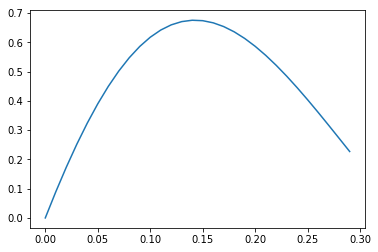

In [15]:
T = 30;
dt = .01;

k = 90.0;
c = 5.0;
m  = 1.0;

w_0 = np.sqrt(k/m);
zeta = c/(2*np.sqrt(m*k));

A = 1.0;
theta = 0.0;
t = np.linspace(0,dt*(T-1),T);
x = A*np.exp(-(zeta*w_0*t))*np.sin(np.sqrt(1-np.square(zeta))*w_0*t + theta);

dxdt = A*(-zeta*w_0*np.exp(-zeta*w_0*t)*np.sin(np.sqrt(1.0-np.square(zeta))*w_0*t + theta) + \
          np.exp(-zeta*w_0*t)*np.cos(np.sqrt(1-np.square(zeta))*w_0*t + theta)*(np.sqrt(1-np.square(zeta))*w_0));

plt.figure();
plt.plot(t,x);
#plt.plot(t,dxdt);
#plt.legend(['x', 'dxdt']);
plt.show();

init_conds = np.array([0.0, dxdt[0]]);

In [16]:
D = 2;
system_str = 'damped_harmonic_oscillator'

behavior_str = 'steady_state';

system_class = system_from_str(system_str);
system = system_class(behavior_str, T, dt, init_conds);
print(system.name)

damped_harmonic_oscillator


In [17]:
K = 1;
M = 1;
num_params = 3;
phi = tf.placeholder(dtype=tf.float64, shape=(K, M, num_params, 1));

X = system.simulate(phi);

_phi = np.expand_dims(np.expand_dims(np.expand_dims(np.array([k,c,m]), 0), 1), 3);

phi (1, 1, 3, 1)


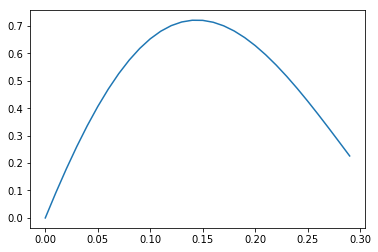

In [18]:
with tf.Session() as sess:
    _X = sess.run(X, {phi:_phi});

t = np.linspace(0.0, dt*(T-1), T);
plt.figure();
plt.plot(t, _X[0,0,0,:]);
#plt.plot(t, _X[0,0,1,:]);
#plt.legend(['x', 'y']);
plt.show();

In [19]:
# behavioral constraints
mu = x
Sigma = .001*np.ones((T,));

{'mu': array([0.        , 0.08913098, 0.17313312, 0.25151968, 0.32387693,
       0.38986418, 0.44921326, 0.5017273 , 0.54727898, 0.58580829,
       0.61731972, 0.64187911, 0.65961008, 0.67069013, 0.67534642,
       0.6738514 , 0.66651818, 0.65369584, 0.63576454, 0.61313076,
       0.58622239, 0.55548394, 0.52137184, 0.48434988, 0.44488472,
       0.40344172, 0.36048088, 0.31645308, 0.27179658, 0.22693376]), 'Sigma': array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001])}
results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/
0 <tf_util.flows.AffineFlowLayer object at 0x122e0abe0>
nope
nope
zshapes in
connect flow
(?, ?, 3, ?)
0 AffineFlow_Layer1
(?, ?, 3, ?)
1 SoftPlusLayer
(?, ?, 3, ?)
phi (?, ?, 3, ?)
(30,) (30,)
train network
training DSN for damped_harmonic_oscillator: dt=0.010, T=30
AL iterati

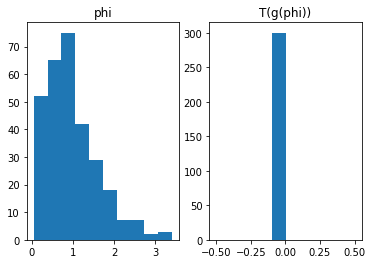

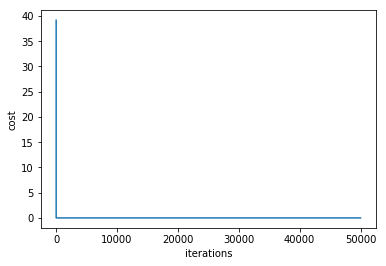

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 2 
H 1.003801631143954
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.60363841517379


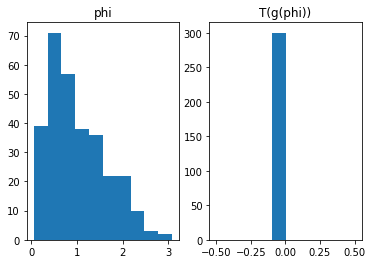

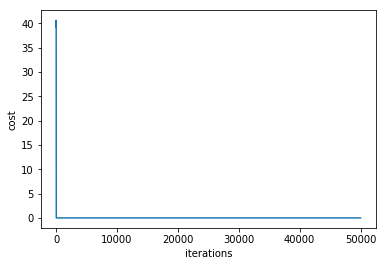

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 3 
H 0.9328512706835962
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.86134232624495


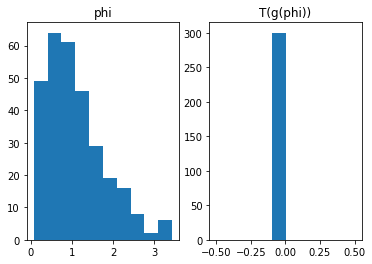

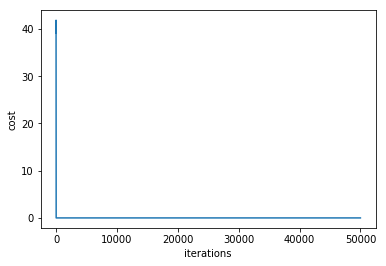

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 4 
H 0.9119065267832532
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.45684508298245


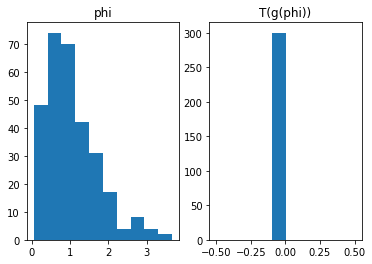

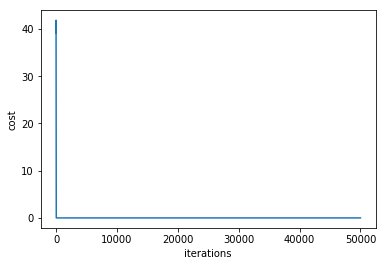

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 5 
H 0.9426477600426707
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.8386353797275


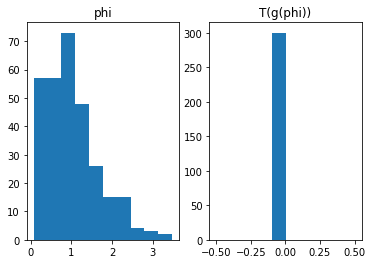

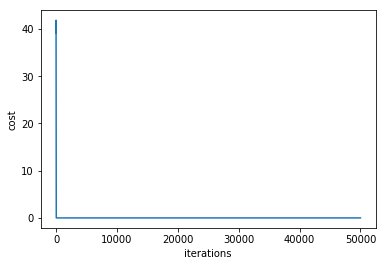

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 6 
H 0.9500565319039833
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36793922.298864916


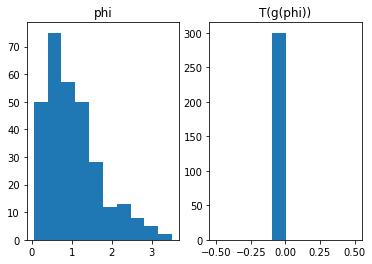

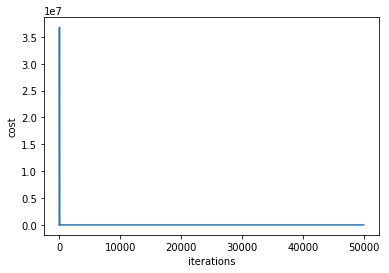

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 7 
H 1.000575778237981
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.82992913343676


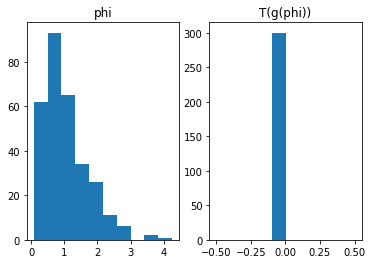

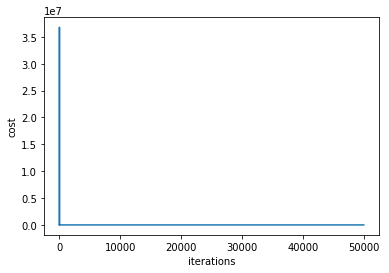

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 8 
H 0.9494388031972429
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.99373036587844


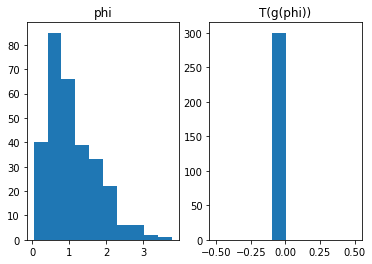

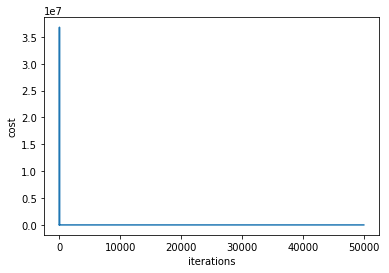

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 9 
H 1.1052516970081883
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.65663227226171


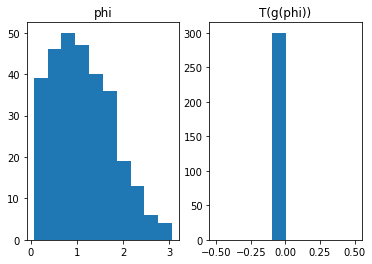

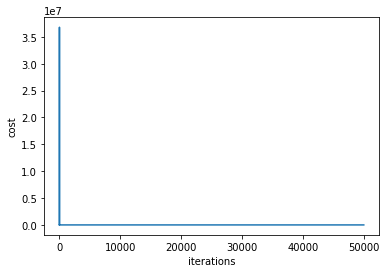

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 10 
H 0.9479308493358212
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 33.040575354116136


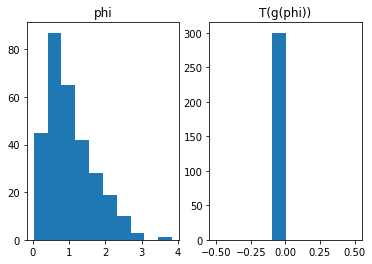

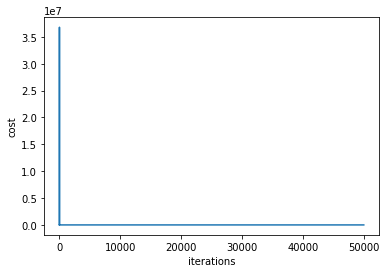

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 11 
H 1.241342261363669
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.490551042765965


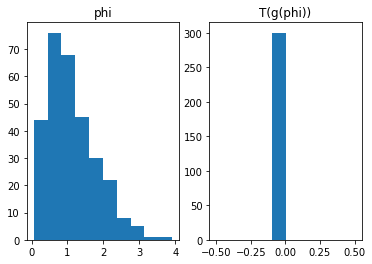

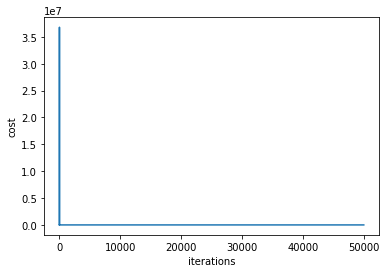

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 12 
H 1.2579896912337336
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.33276038763734


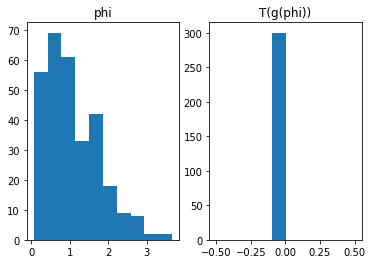

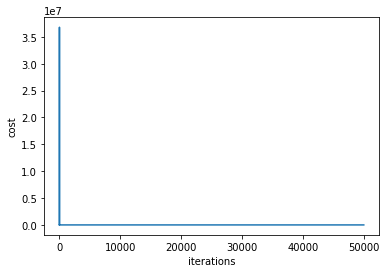

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 13 
H 1.056736824678368
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.80178694611334


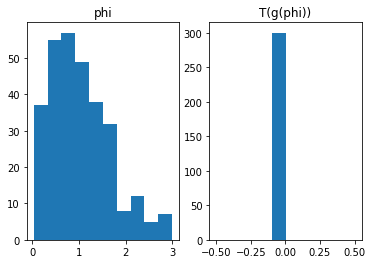

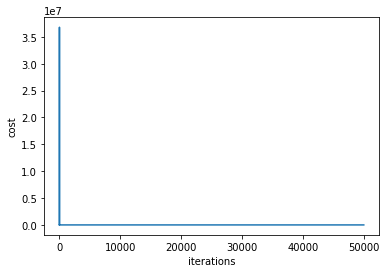

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 14 
H 1.1747677049908631
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.5078149849415


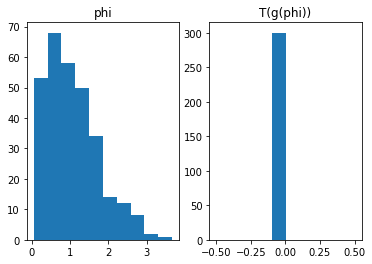

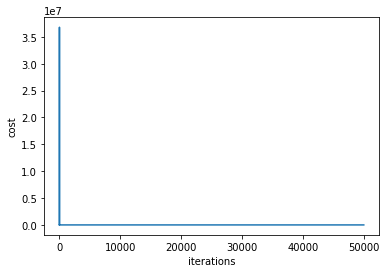

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 15 
H 1.1403968976536638
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.8721790190958


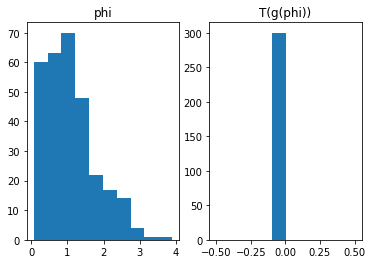

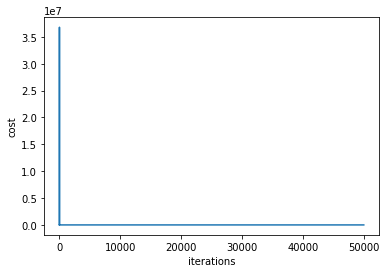

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 16 
H 1.0635295731110372
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 34.48930939175405


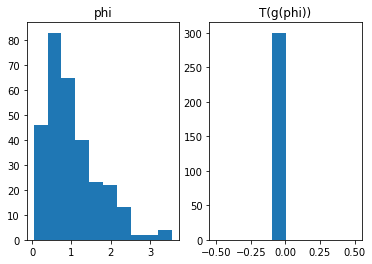

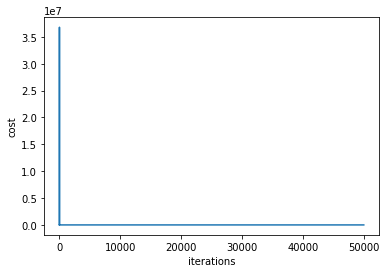

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 17 
H 1.2567300158814196
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.28943186562832


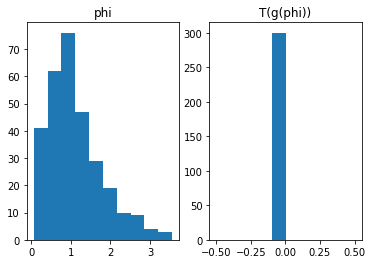

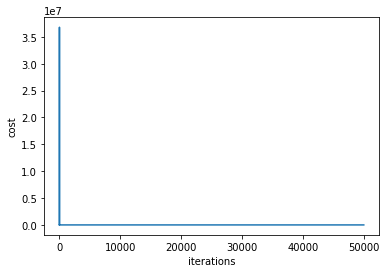

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 18 
H 1.2736265838750707
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 171792169.34873986


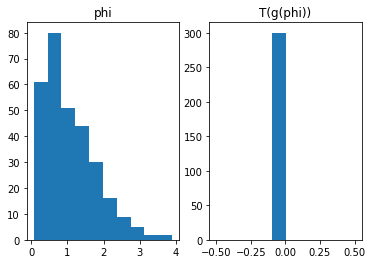

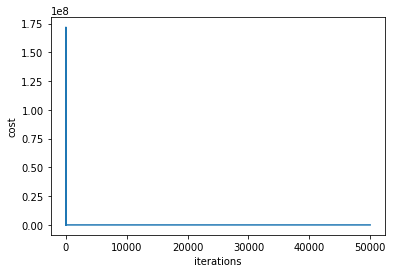

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 19 
H 1.1944496909137883
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 155.61528926849863


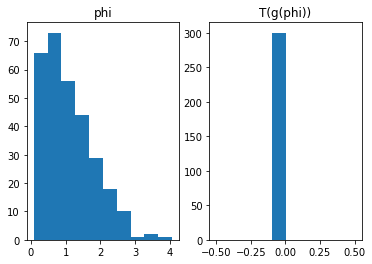

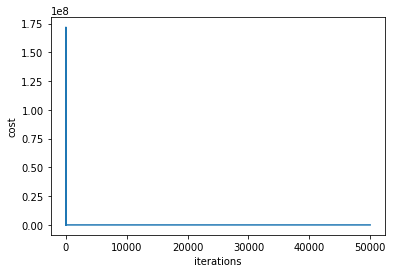

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 20 
H 1.1154810654229266
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 32.86652183795155


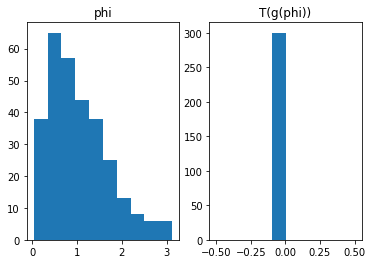

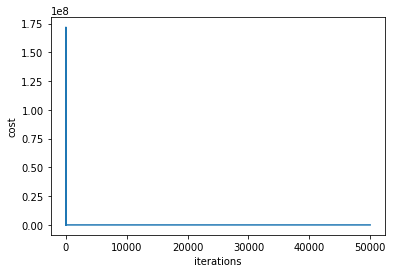

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 21 
H 1.3255296325908266
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.00783126754866


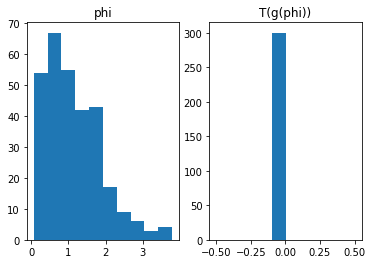

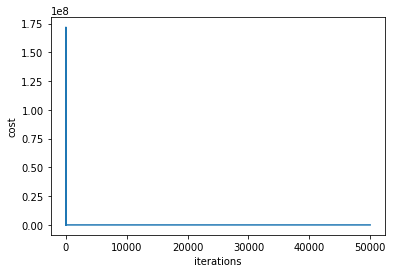

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 22 
H 1.2383881050109273
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.02085243002885


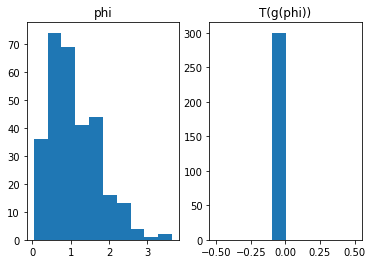

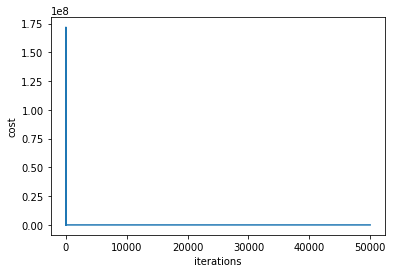

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 23 
H 1.1453199540398393
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.244712117751774


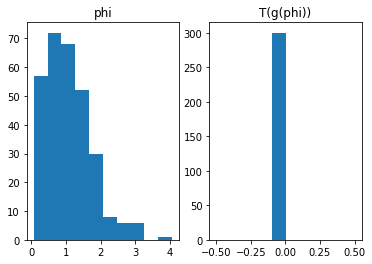

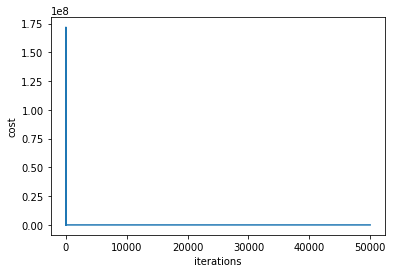

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 24 
H 1.2077110281738612
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.43548693150818


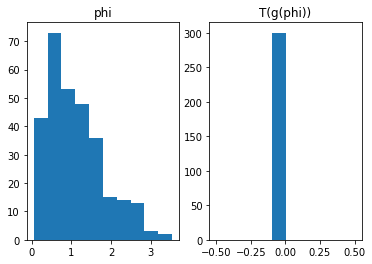

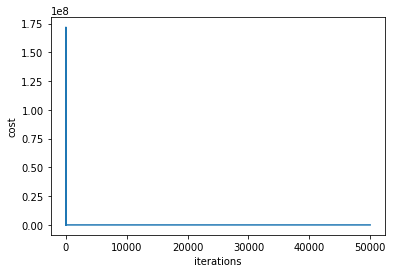

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 25 
H 1.2695195578770926
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.308986842468705


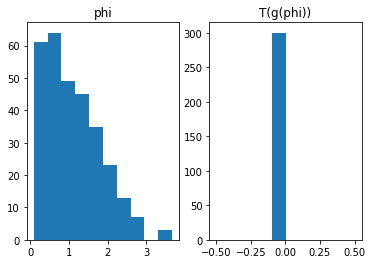

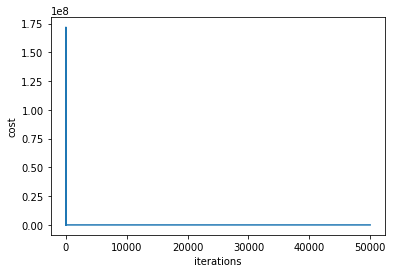

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 26 
H 1.1909992899405817
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.332489543929256


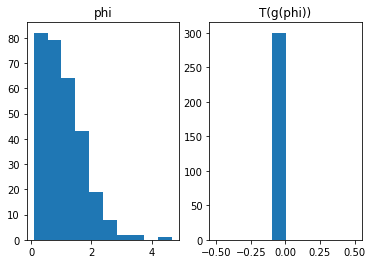

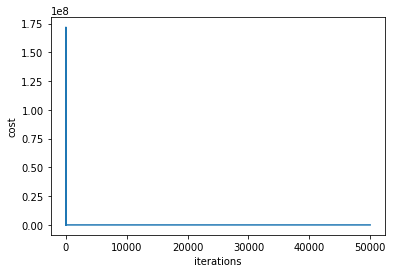

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 27 
H 1.174255679130873
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.18371048214825


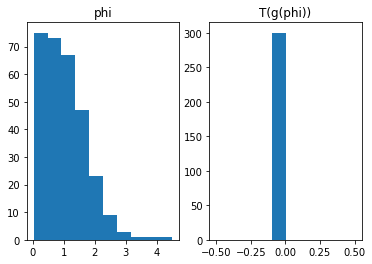

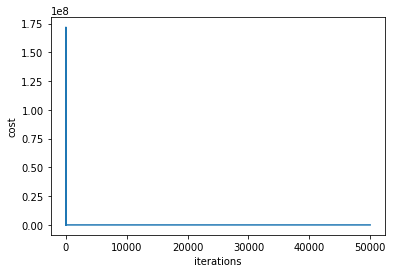

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 28 
H 1.2038364685980325
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.77539503135706


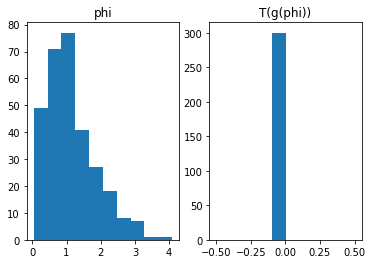

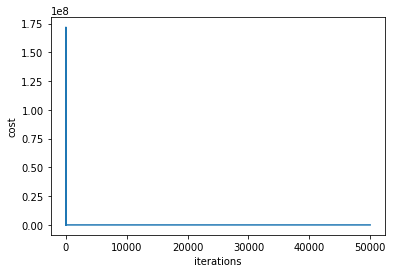

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 29 
H 1.309063730211971
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 43.68504760037386


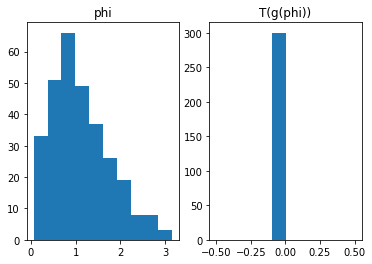

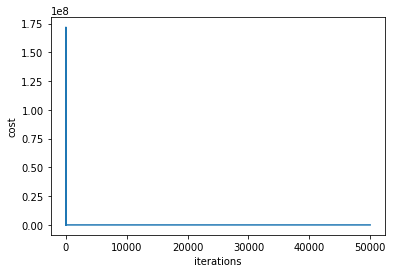

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 30 
H 1.1827782987532034
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.71767306222947


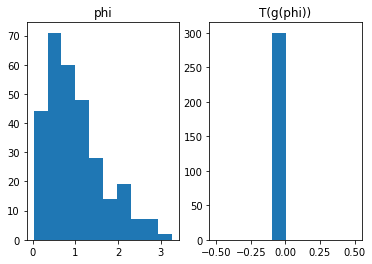

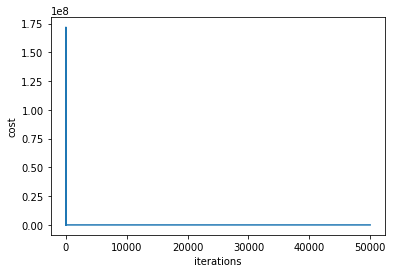

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 31 
H 1.3215620450155297
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.55922488485204


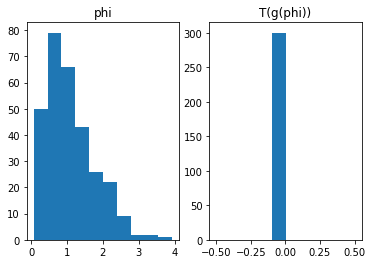

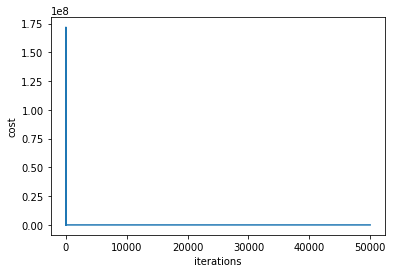

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 32 
H 1.2358206761076675
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.471800587617246


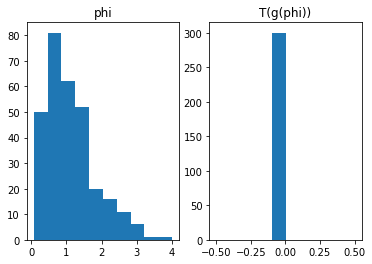

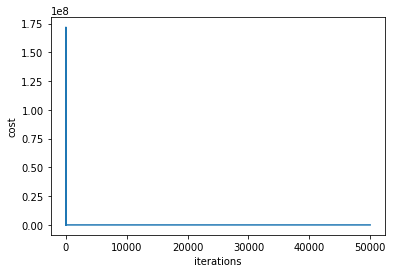

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 33 
H 1.2324676964248495
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 34.957939482037695


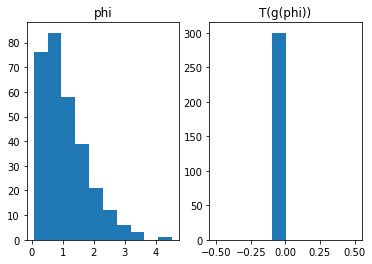

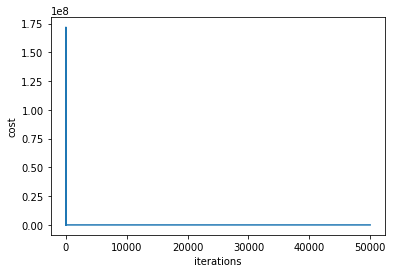

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 34 
H 1.1282619213341853
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.65014173469952


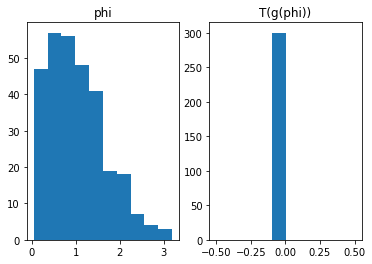

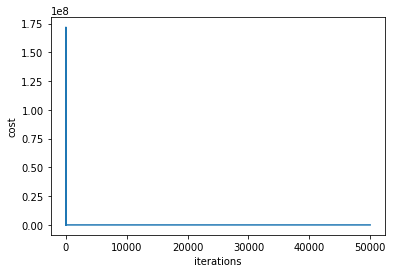

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 35 
H 1.2251591391940833
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.976177746201465


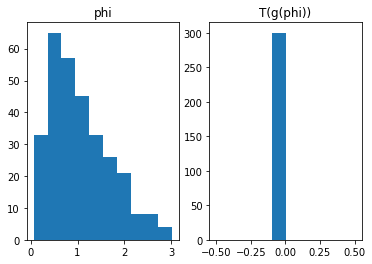

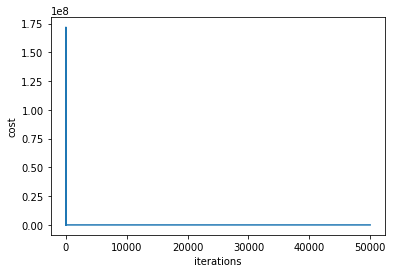

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 36 
H 1.2247063909472953
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.85003645472284


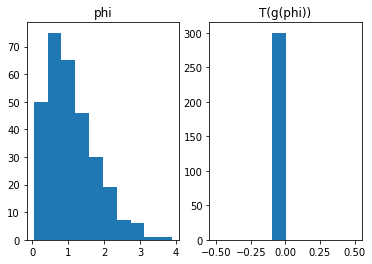

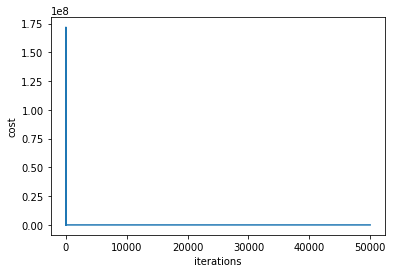

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 37 
H 1.4030916772833582
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.07663253540025


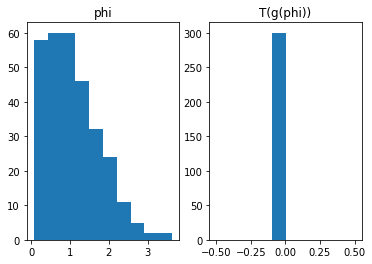

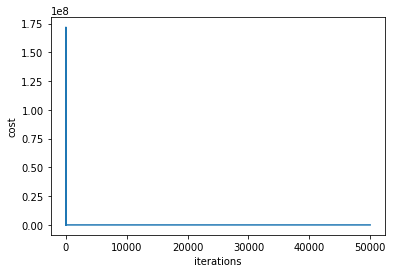

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 38 
H 1.2598125915589076
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.544624395562394


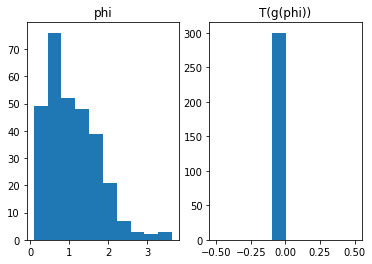

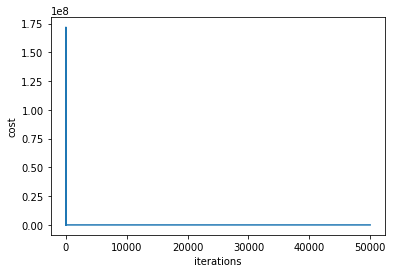

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 39 
H 1.2373085164403783
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 34.2935170642189


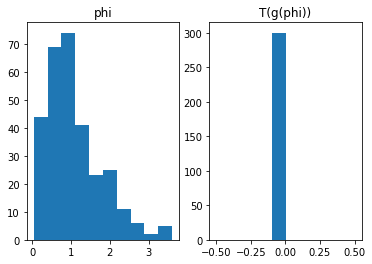

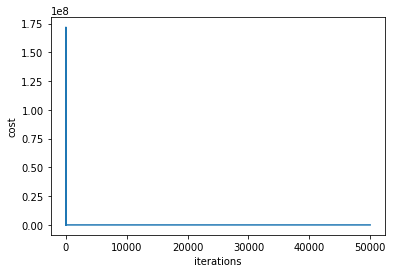

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 40 
H 1.1878617375329907
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.169502328327525


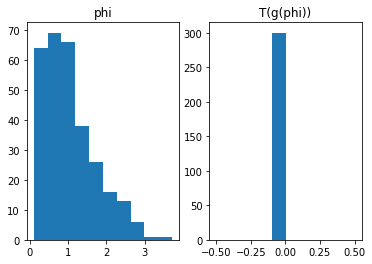

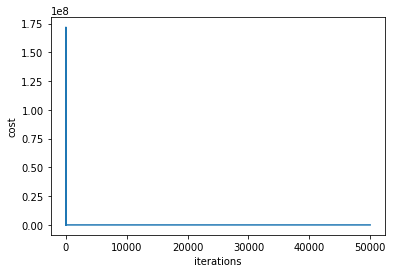

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 41 
H 1.2081395800467167
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.548254784505964


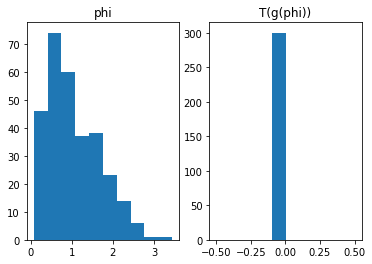

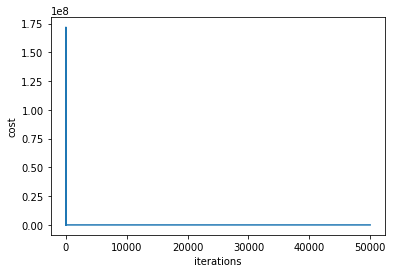

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 42 
H 1.3312862701840107
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.81058275133228


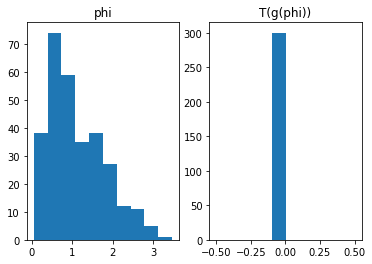

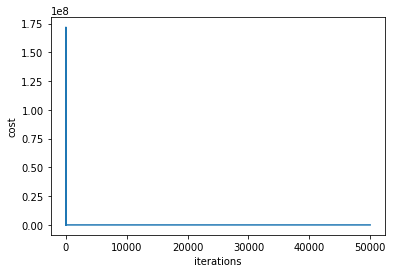

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 43 
H 1.3015108753087086
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 34.69245842575669


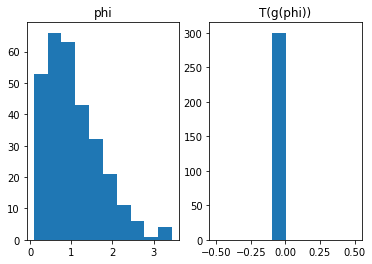

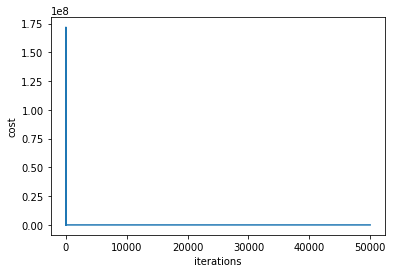

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 44 
H 1.2819645361973593
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.45389731954668


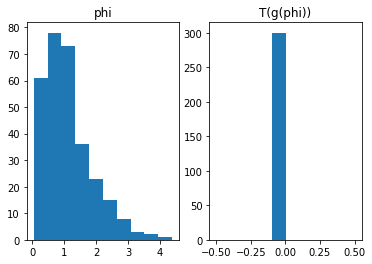

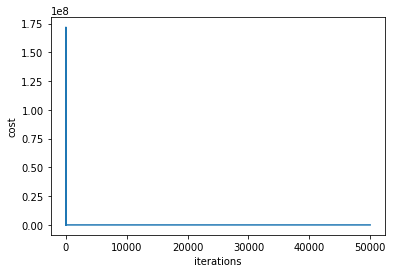

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 45 
H 1.2768769422830886
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.29532993103637


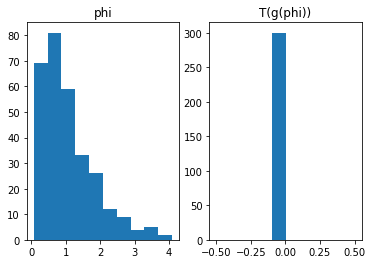

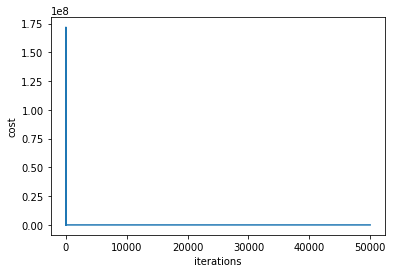

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 46 
H 1.292641830904392
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.47273173337924


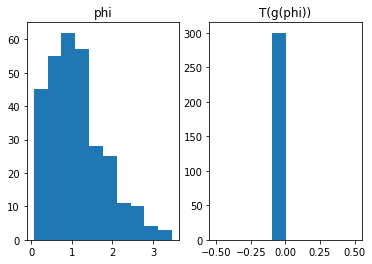

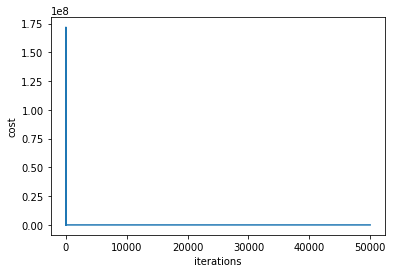

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 47 
H 1.37261710310216
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.290873477279305


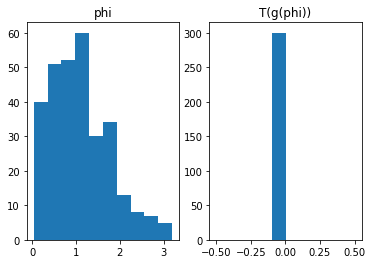

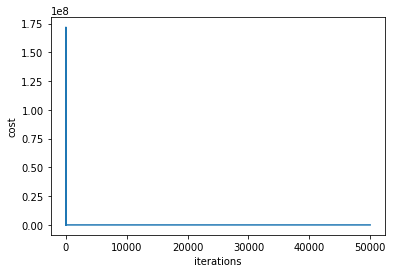

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 48 
H 1.4157075589860384
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.99728812964499


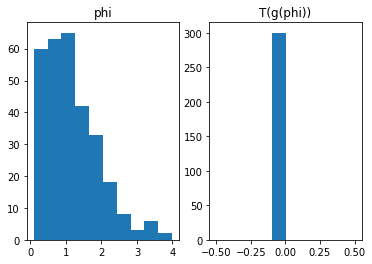

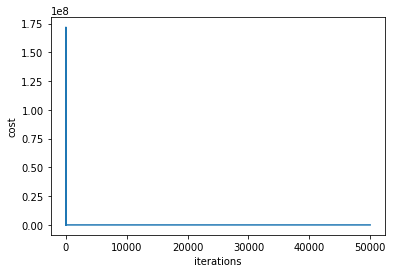

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 49 
H 1.3057687708266599
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.166191925355974


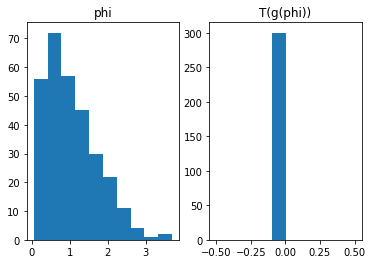

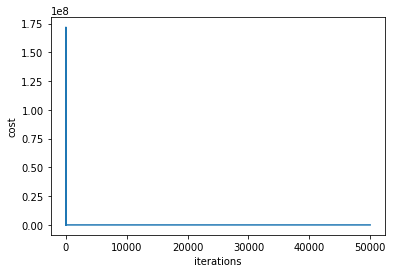

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 50 
H 1.2926619244642108
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.278548648542035


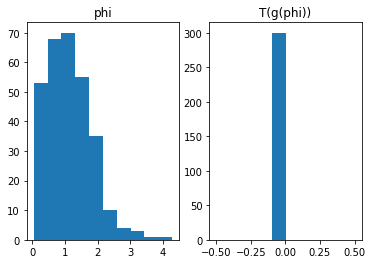

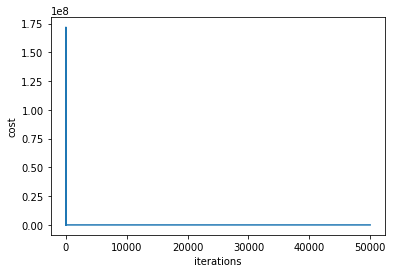

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 51 
H 1.3019267476932725
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.58953869378889


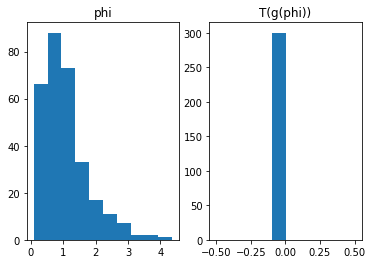

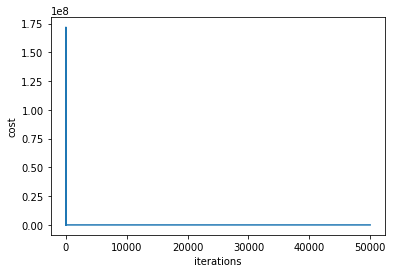

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 52 
H 1.4192428918499902
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.302715486747516


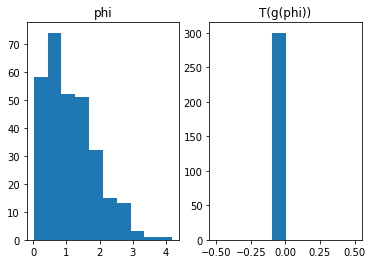

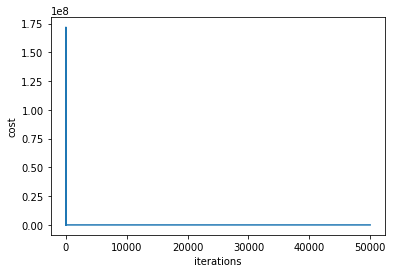

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 53 
H 1.434687016149749
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.096238277488474


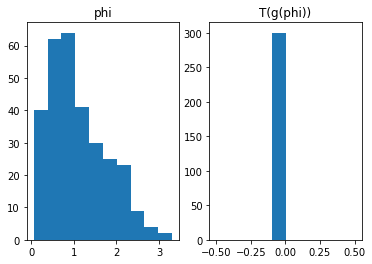

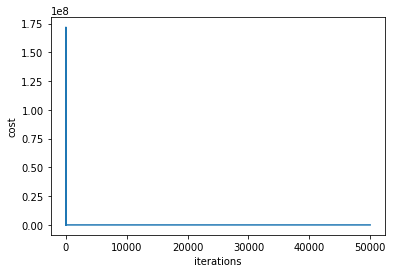

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 54 
H 1.2881101677175892
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.750387889680106


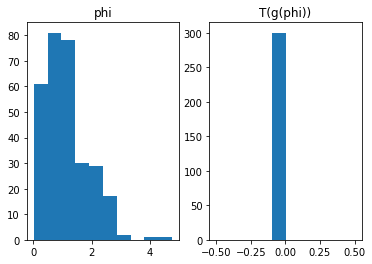

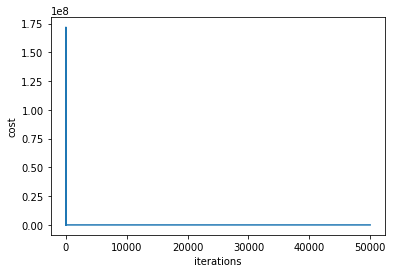

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 55 
H 1.3228060543195193
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.327347622201216


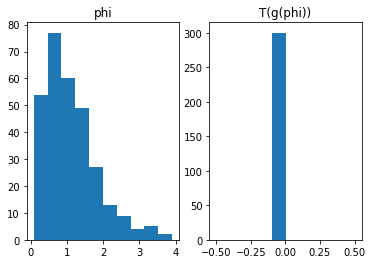

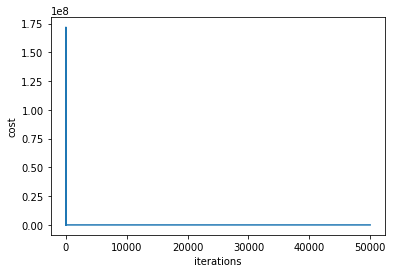

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 56 
H 1.1590473931818792
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.21543653821791


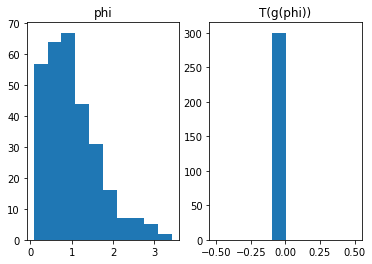

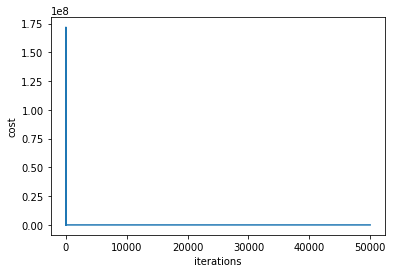

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 57 
H 1.33059832282324
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.227370671805964


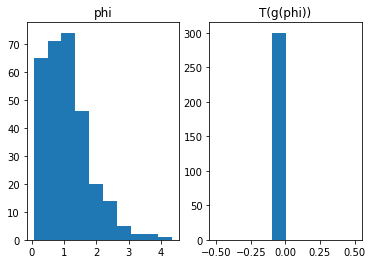

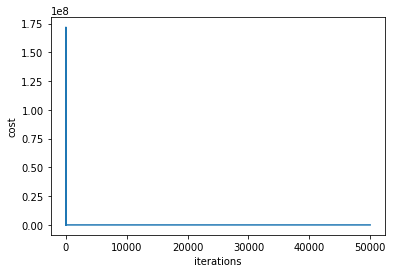

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 58 
H 1.3228303373588117
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.04649927015864


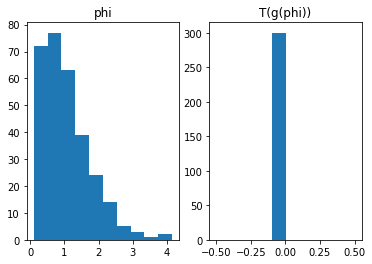

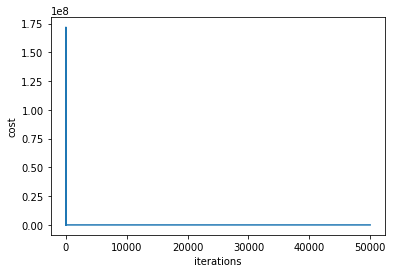

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 59 
H 1.2793152505658931
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.2630466167668


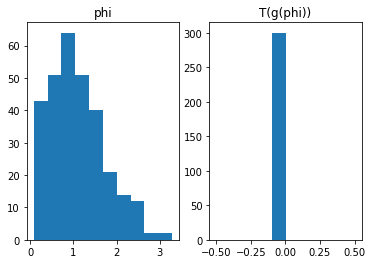

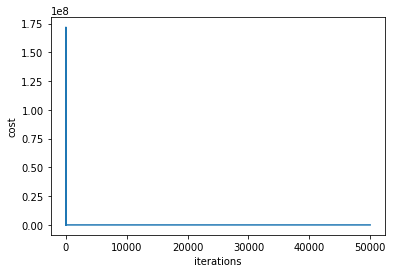

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 60 
H 1.3020665229856878
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.45165856799338


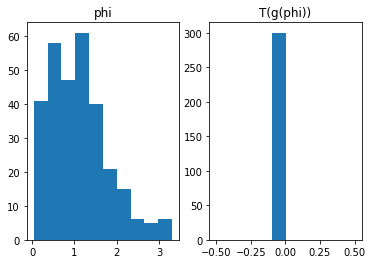

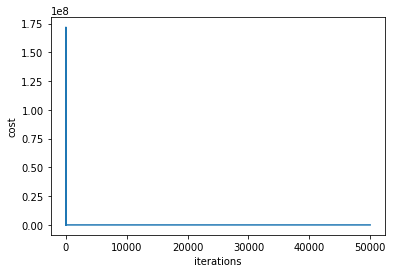

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 61 
H 1.3668443587941728
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.32603029102676


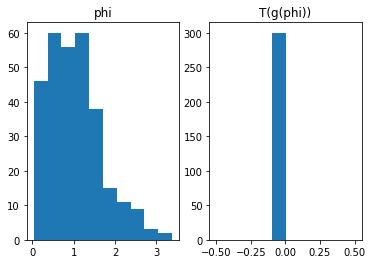

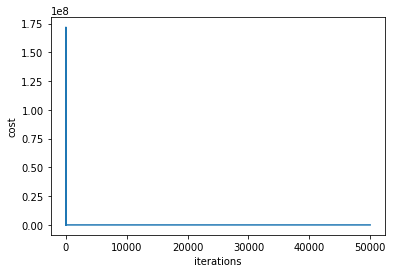

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 62 
H 1.2627156203035104
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.510841463528315


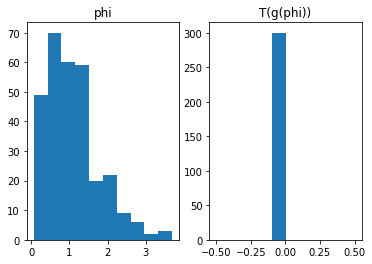

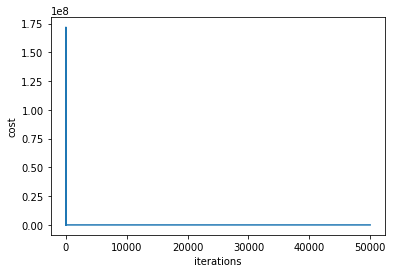

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 63 
H 1.371194285697606
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.38187332571039


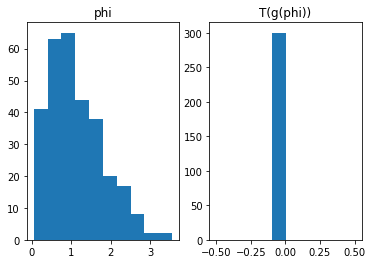

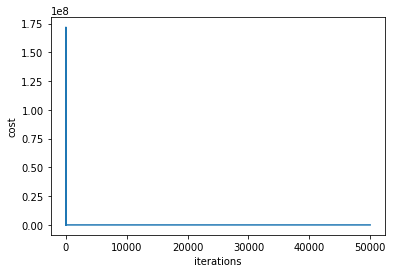

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 64 
H 1.3727343025213083
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.366089214944694


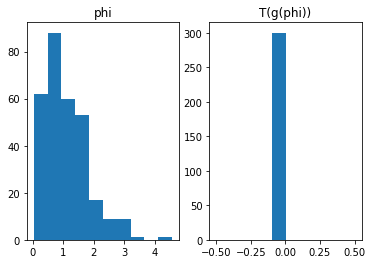

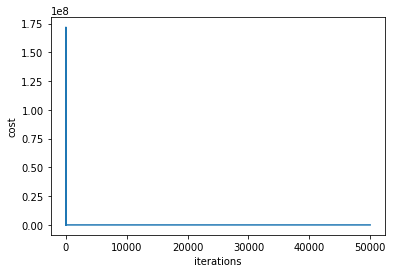

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 65 
H 1.2063035359133656
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.924785469822744


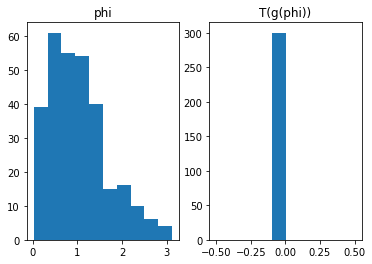

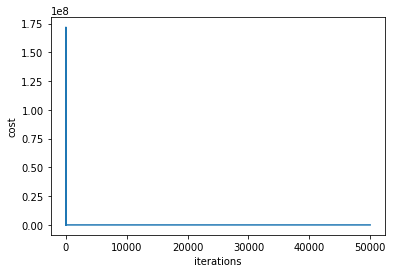

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 66 
H 1.3110782909554095
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.00213474304553


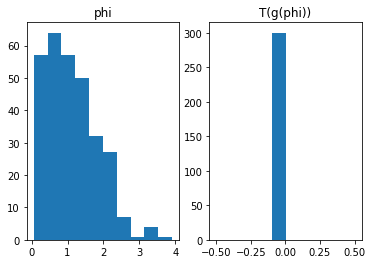

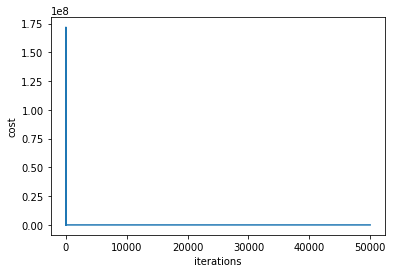

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 67 
H 1.452484820598878
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.91856081065244


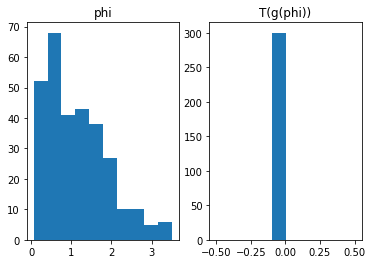

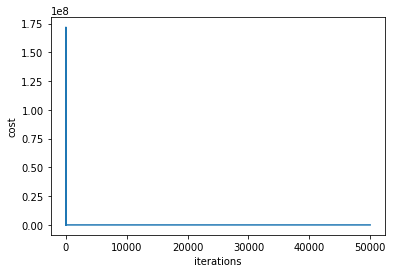

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 68 
H 1.2334149200176687
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.83915848728478


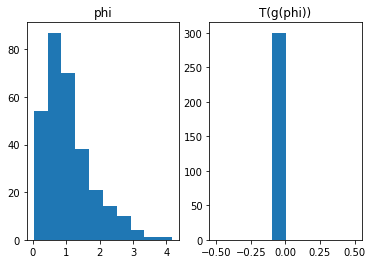

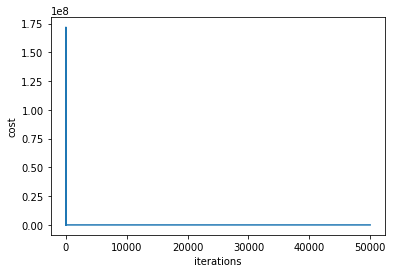

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 69 
H 1.2716128622466552
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.0749697377874


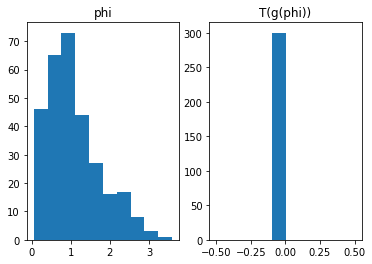

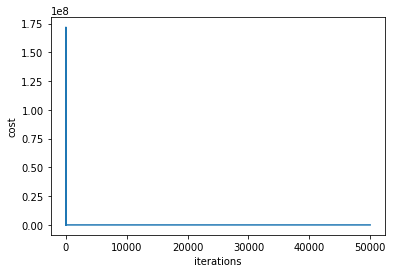

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 70 
H 1.3873743071647575
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.87220731290175


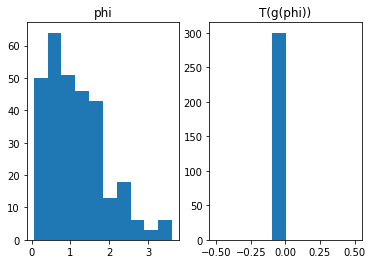

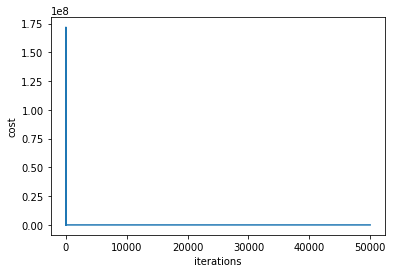

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 71 
H 1.279225426764849
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.04466403607189


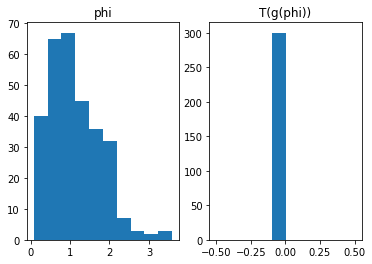

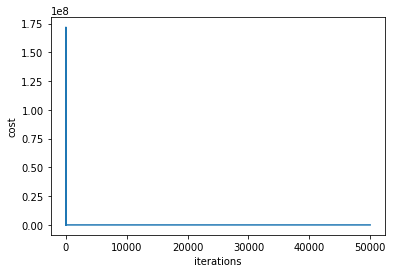

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 72 
H 1.2950595602571164
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.345250273221005


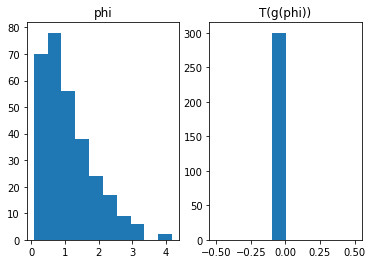

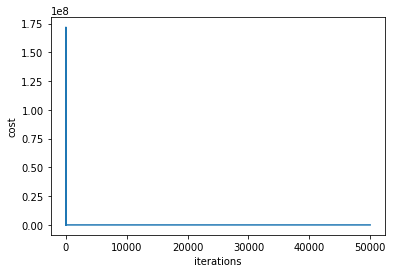

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 73 
H 1.2888731001307543
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.31943497698115


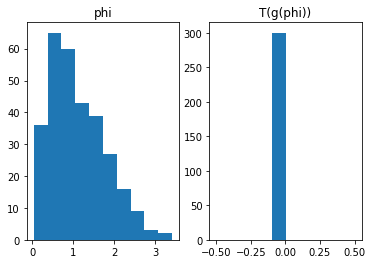

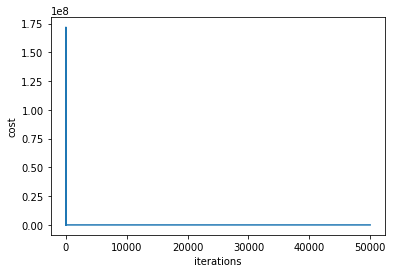

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 74 
H 1.2919138453004317
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.87147544741997


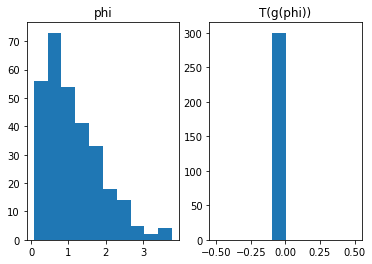

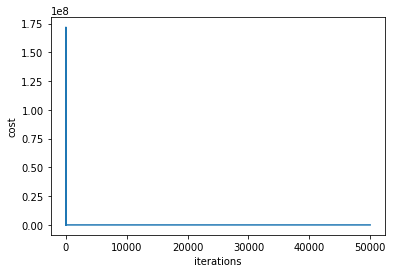

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 75 
H 1.45530696124231
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.70310081640969


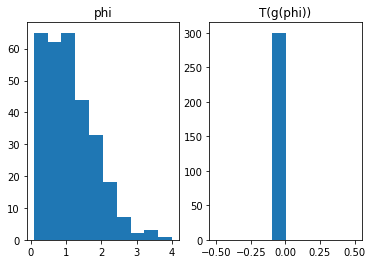

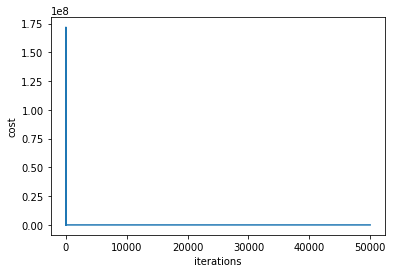

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 76 
H 1.2915323502735103
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.075813470046455


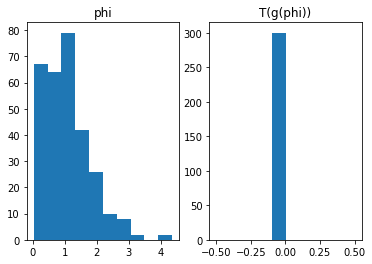

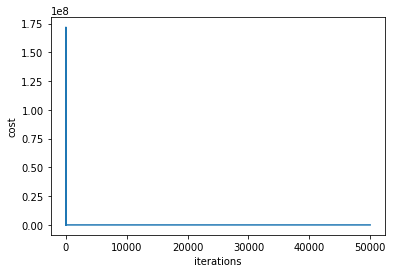

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 77 
H 1.3288888994005565
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.35173737195684


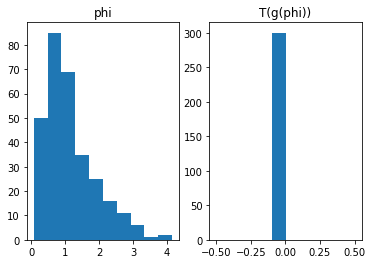

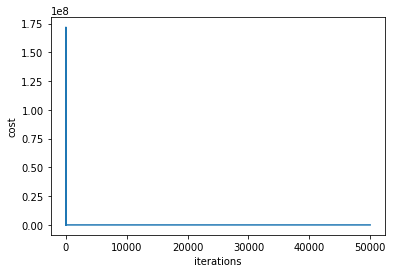

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 78 
H 1.228905371513705
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.201192639045665


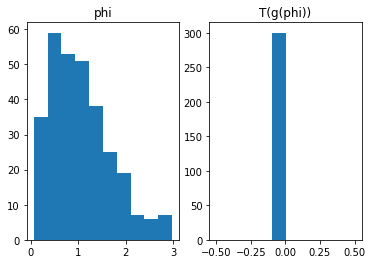

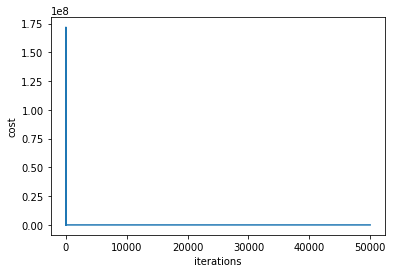

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 79 
H 1.3553265331002264
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 44.49471959927141


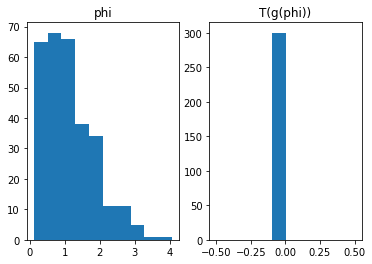

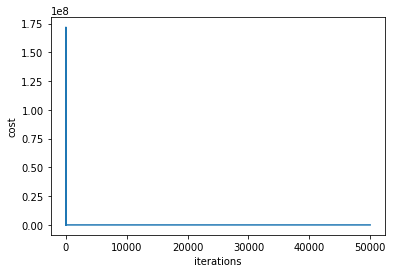

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 80 
H 1.225358666836215
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.132066304542604


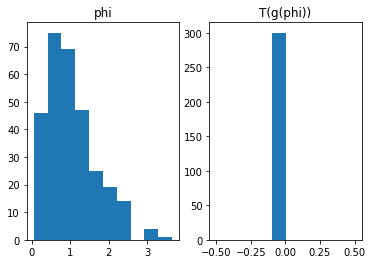

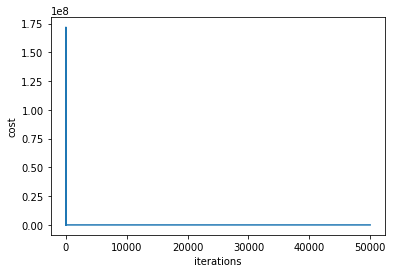

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 81 
H 1.4096631676006666
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 44.101510519001536


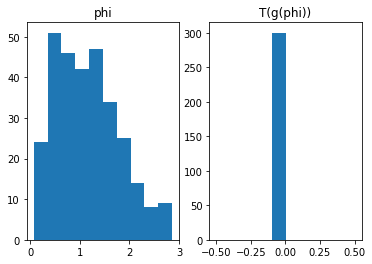

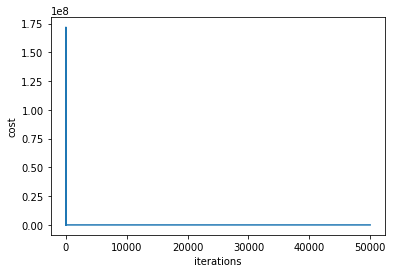

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 82 
H 1.336060035996573
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.06278363815911


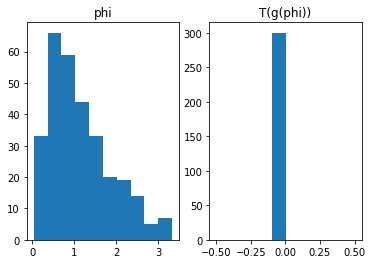

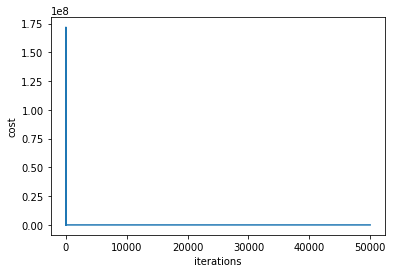

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 83 
H 1.3158811543237534
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.82229347788148


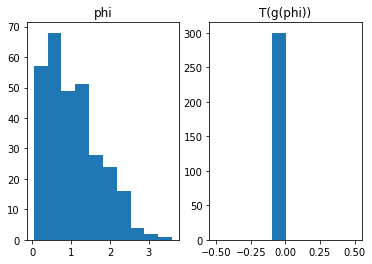

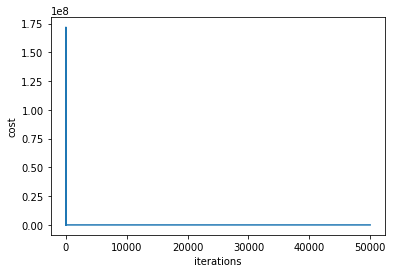

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 84 
H 1.2590695682804691
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.32420465397758


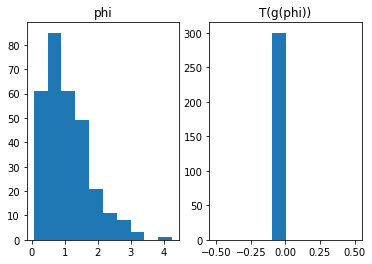

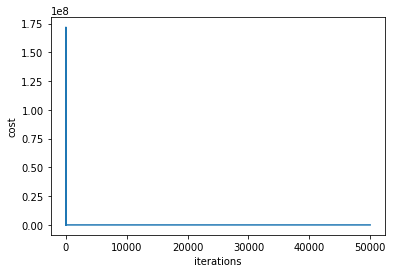

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 85 
H 1.3074038837065547
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.79408458828388


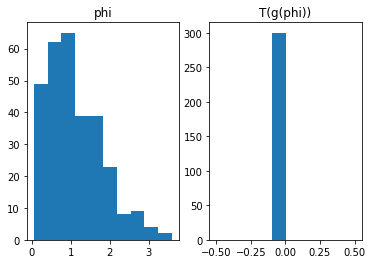

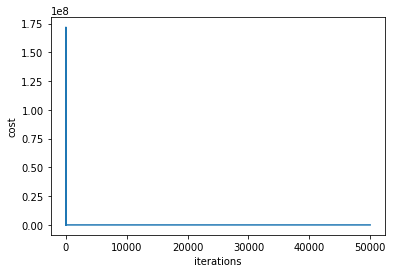

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 86 
H 1.4270949774406203
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.95415035637238


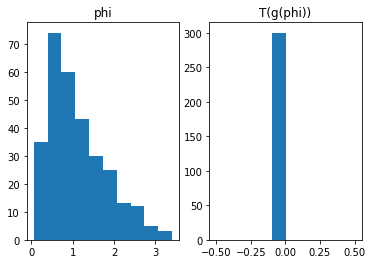

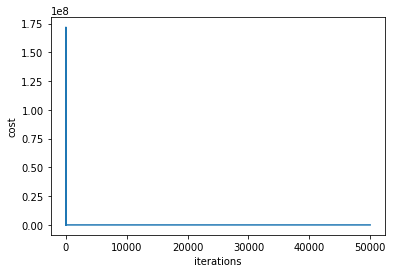

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 87 
H 1.212323564271506
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.753851459895195


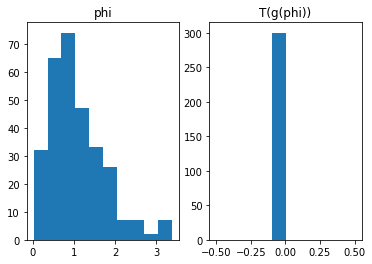

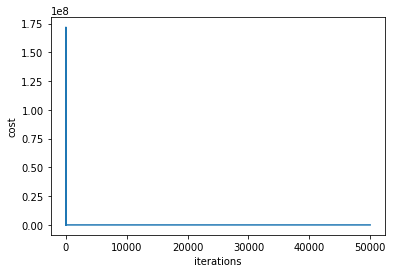

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 88 
H 1.420721501679119
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.11268963001695


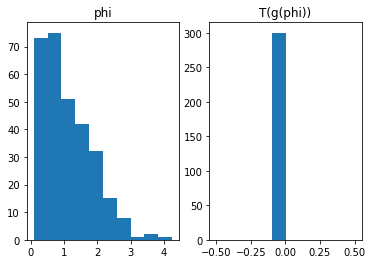

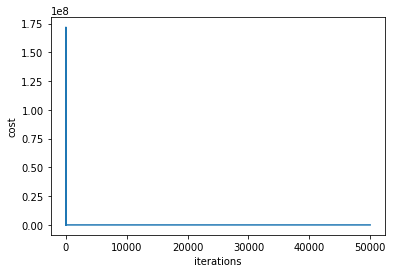

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 89 
H 1.3913943547205276
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.87899520412329


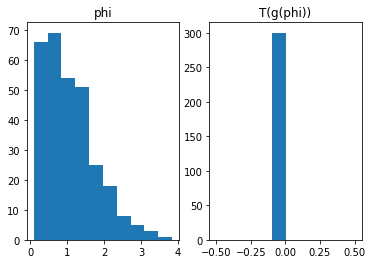

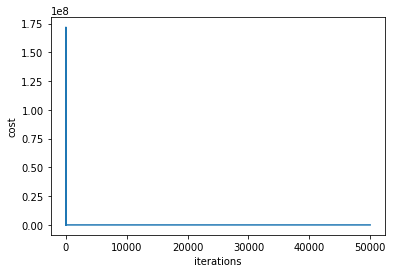

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 90 
H 1.2012082646468747
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.488819254151345


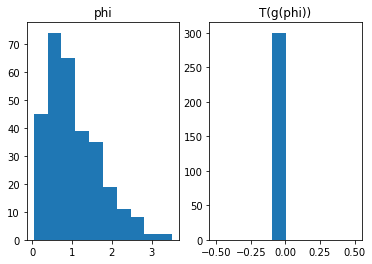

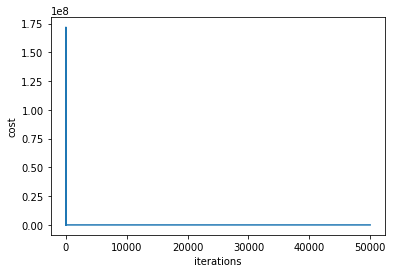

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 91 
H 1.2200511470731035
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.58794111871859


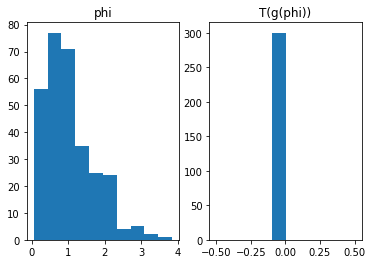

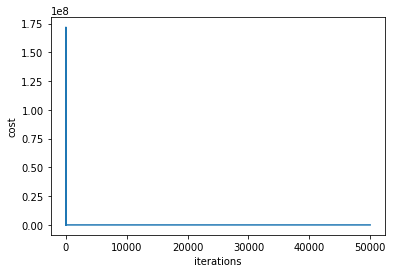

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 92 
H 1.3926924896614237
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.75114436691999


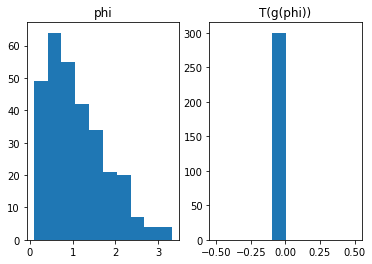

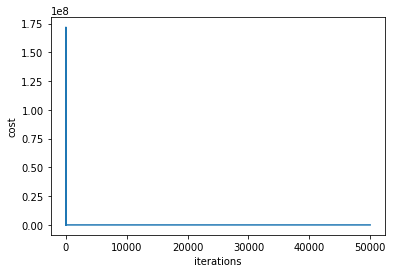

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 93 
H 1.2356637169329812
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.639285147846564


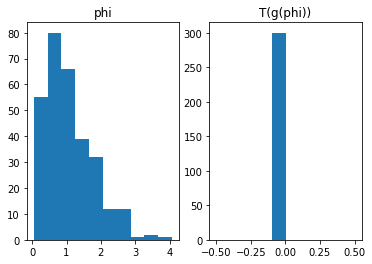

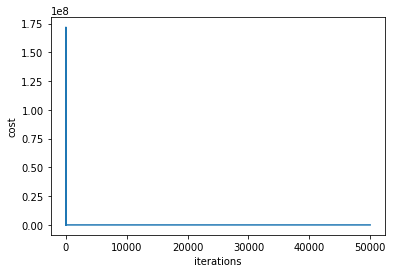

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 94 
H 1.156986313078005
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.401339234537666


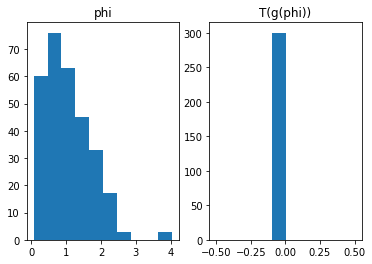

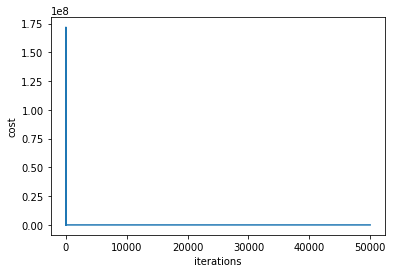

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 95 
H 1.3062675596440216
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 44518839.8328182


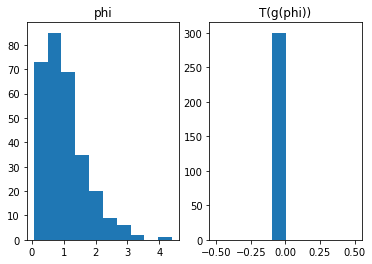

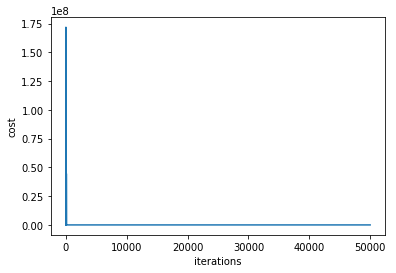

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 96 
H 1.2383446805670326
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.65624878468994


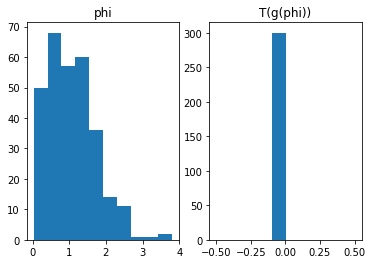

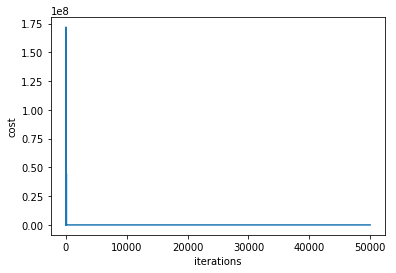

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 97 
H 1.3303996507995717
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.838767589163375


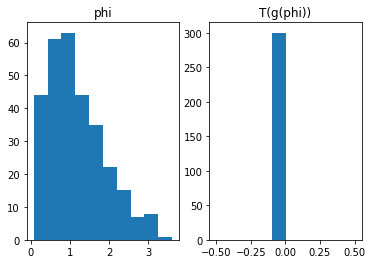

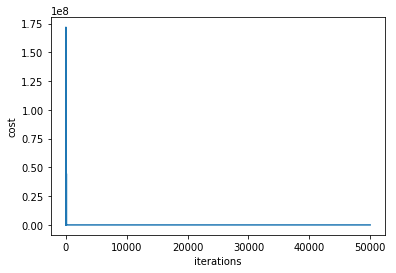

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 98 
H 1.2837426419855964
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.27214345423968


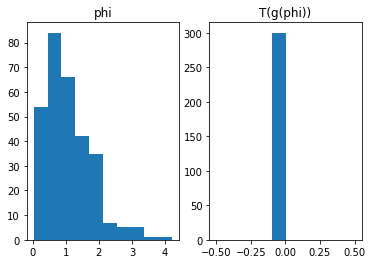

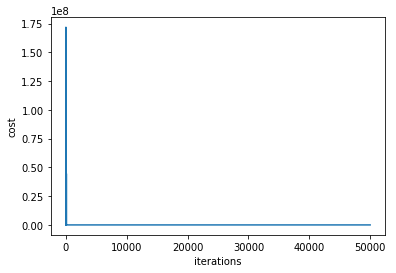

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 99 
H 1.2459578191424585
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.89409738584057


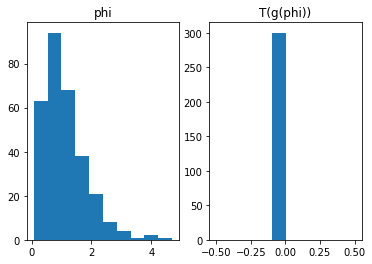

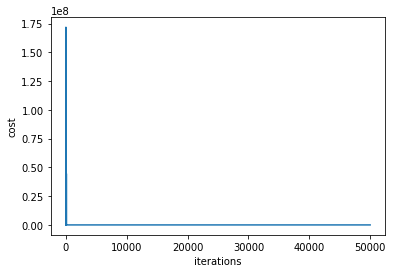

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 100 
H 1.249105209769987
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.99768959705134


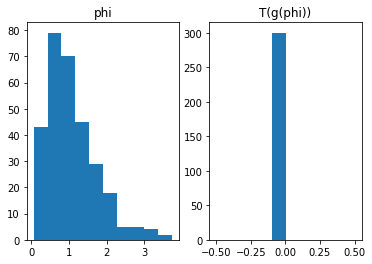

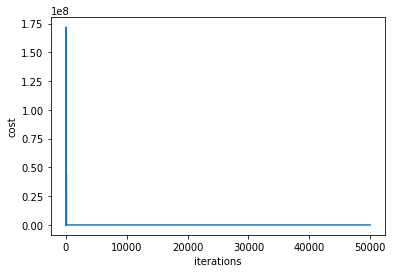

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 101 
H 1.3079711423071874
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.50066226592092


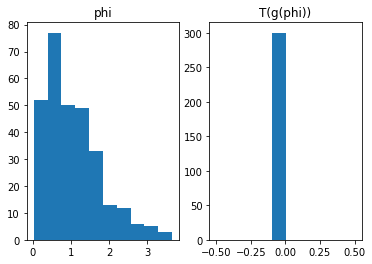

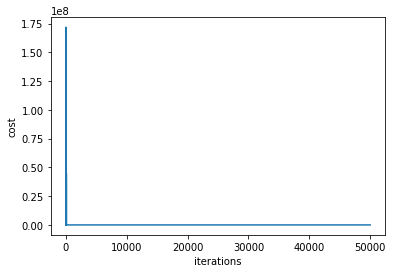

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 102 
H 1.3756708730269112
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 42.656664734794994


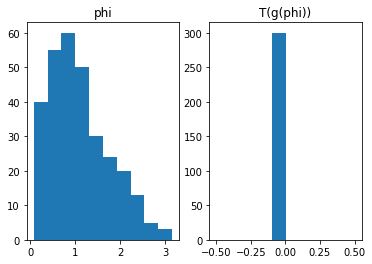

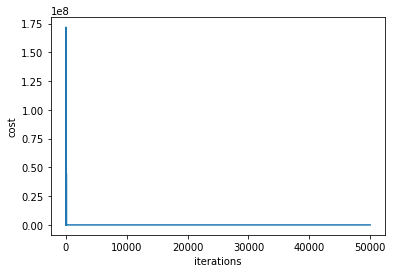

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 103 
H 1.3866246505856963
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.20747905908612


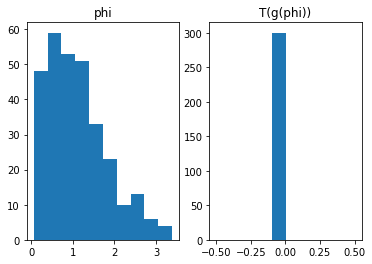

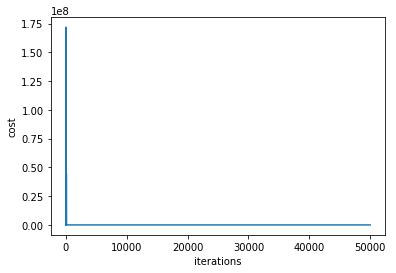

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 104 
H 1.271493484130423
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.236156389367665


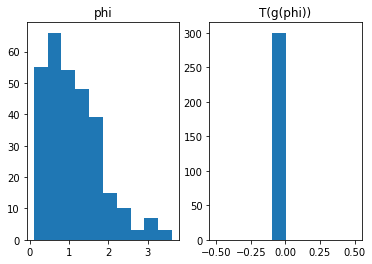

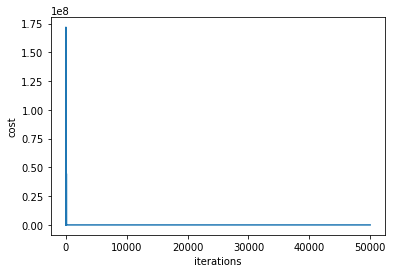

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 105 
H 1.263215384929709
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.85795441902667


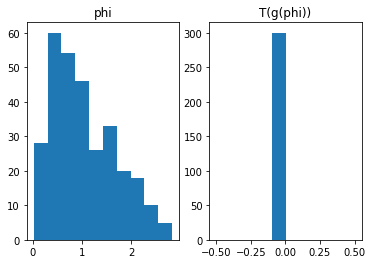

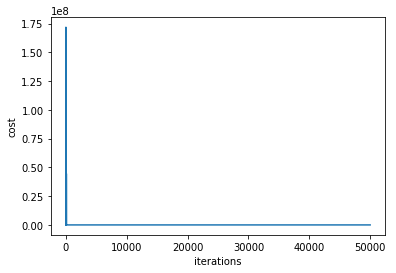

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 106 
H 1.3069490043865146
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.582358360700894


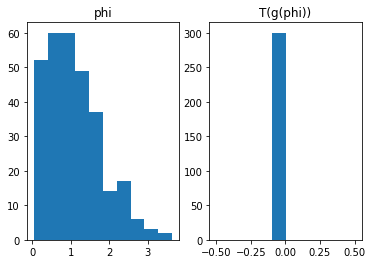

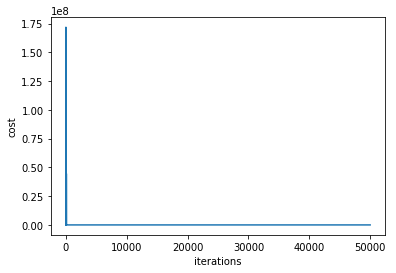

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 107 
H 1.2874943202013631
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.68121382956974


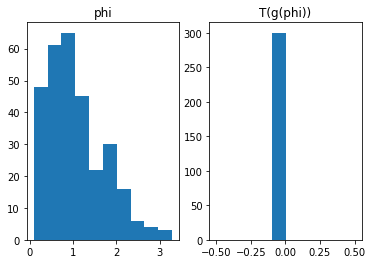

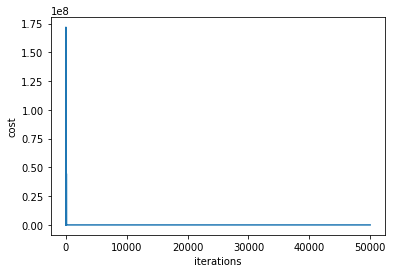

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 108 
H 1.3428799150102484
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.67359896806305


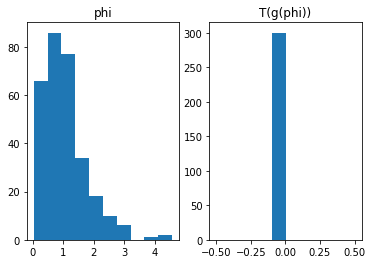

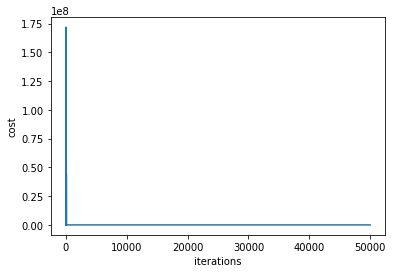

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 109 
H 1.255341914939913
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.105236522456636


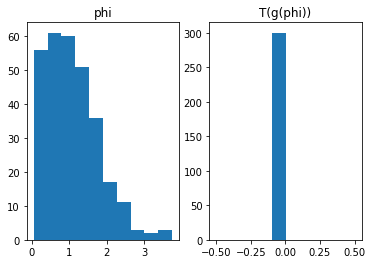

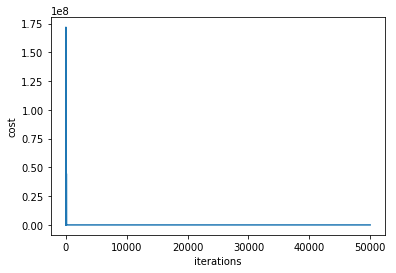

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 110 
H 1.3227653003145892
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.77738129674148


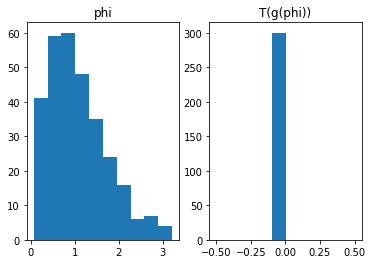

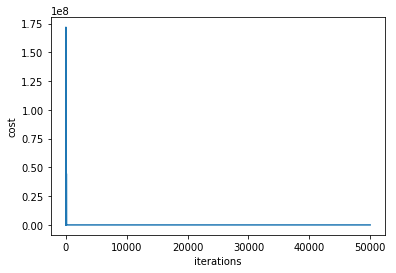

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 111 
H 1.2822242340240315
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.439905301754344


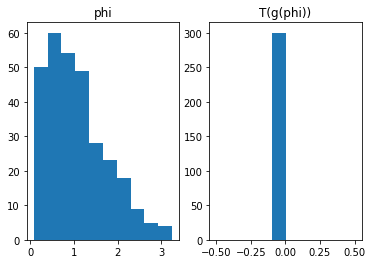

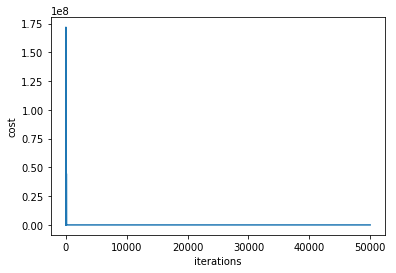

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 112 
H 1.2763994469387638
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.75763860716543


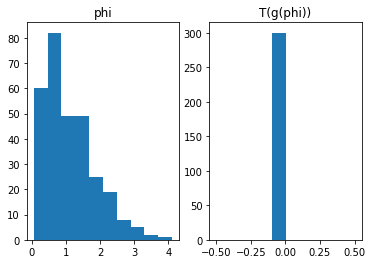

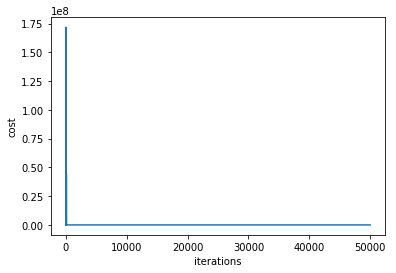

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 113 
H 1.2603203246945842
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 35.48440298427495


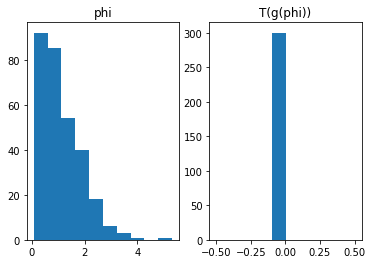

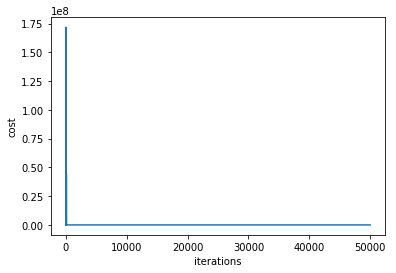

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 114 
H 1.3759042458380046
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.2901056144801


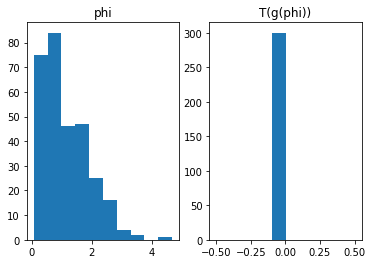

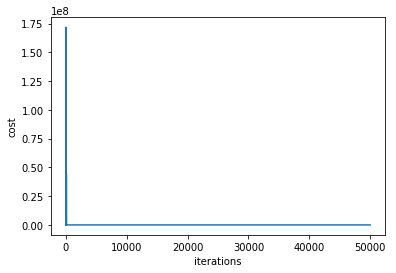

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 115 
H 1.2900882707252637
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.91449299862896


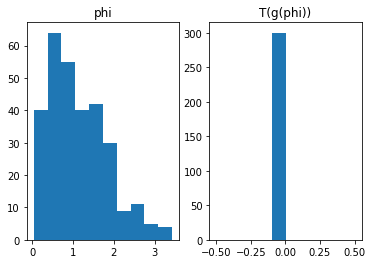

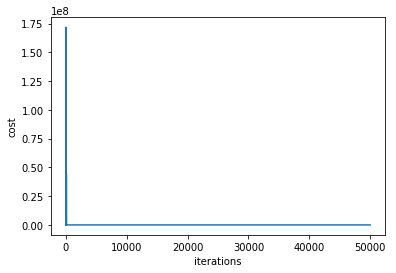

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 116 
H 1.2580350301981649
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.44427538257288


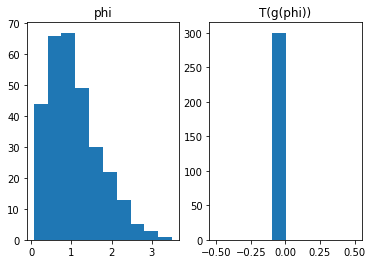

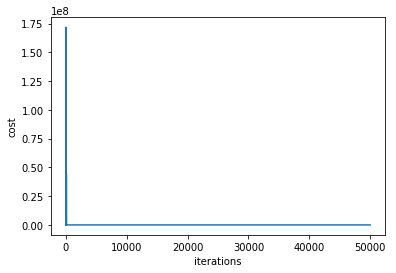

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 117 
H 1.3224524111302067
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.997374340235176


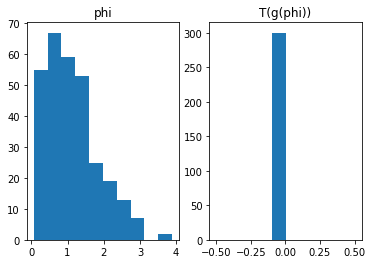

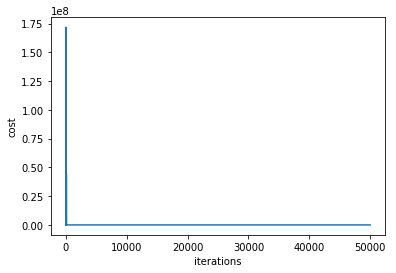

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 118 
H 1.2387291433765688
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.048076961455976


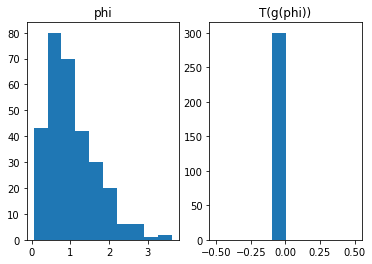

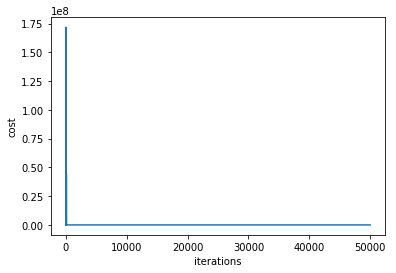

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 119 
H 1.359052127415436
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.29890375152894


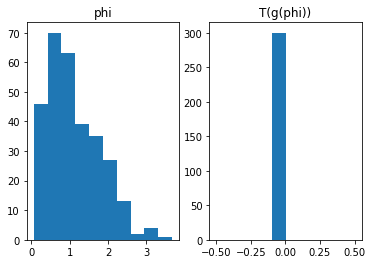

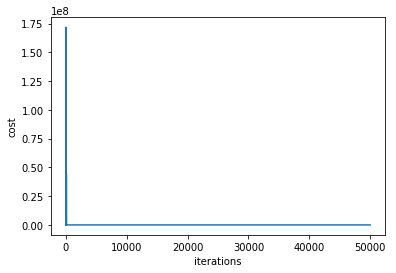

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 120 
H 1.347360873192213
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 43.769600437112764


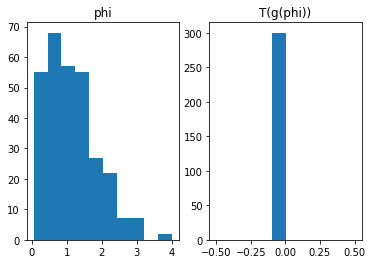

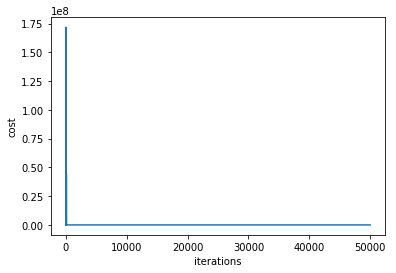

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 121 
H 1.201902597217968
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.34723209754576


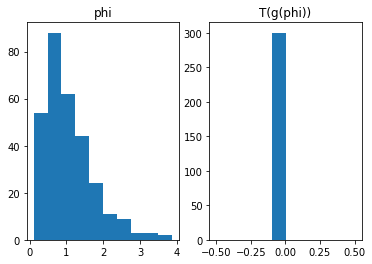

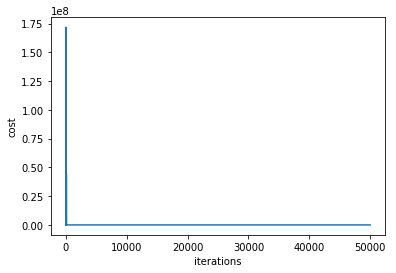

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 122 
H 1.3886978657555111
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 40.80257403584422


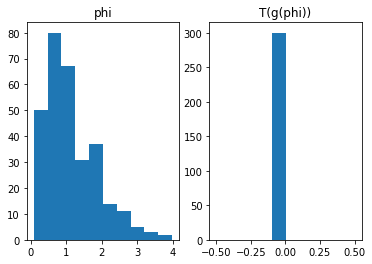

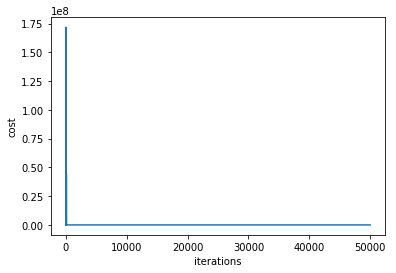

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 123 
H 1.2901899241920778
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.929609971573406


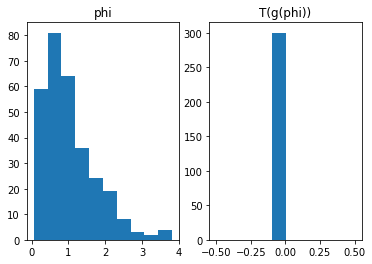

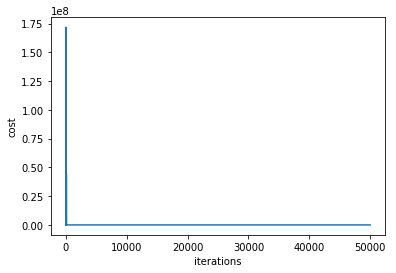

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 124 
H 1.2752844458140653
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.57987710014411


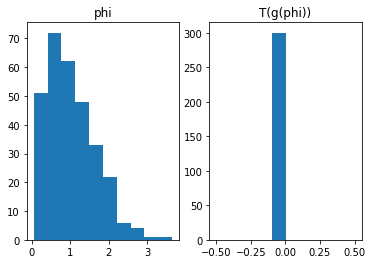

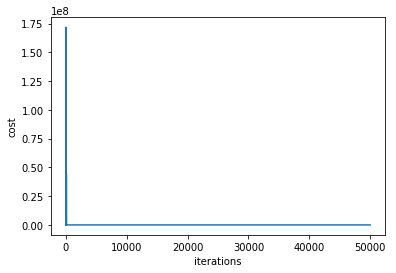

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 125 
H 1.2975894473222895
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.928851156571966


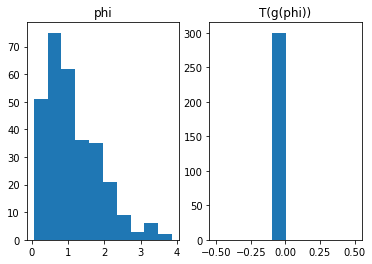

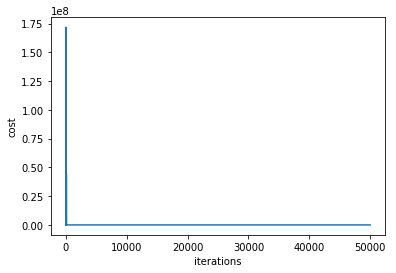

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 126 
H 1.2330970738857836
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 36.95238209948534


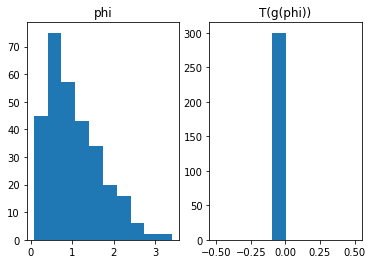

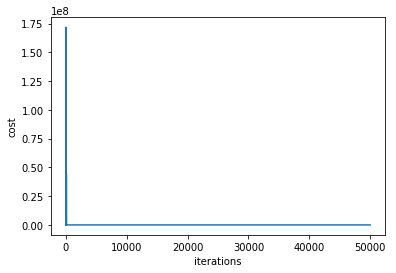

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 127 
H 1.2020362063920558
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.25100412587458


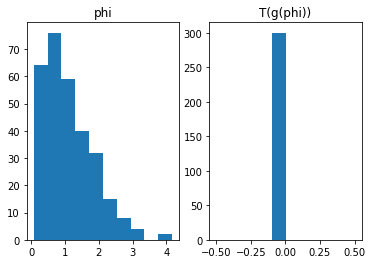

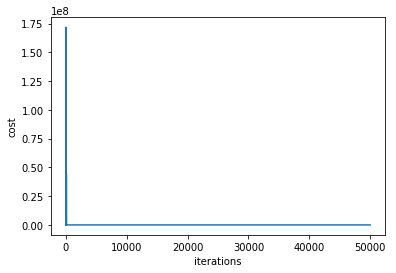

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 128 
H 1.30198479069062
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.761967011063824


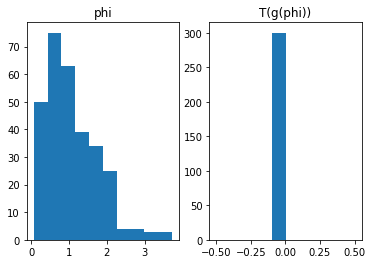

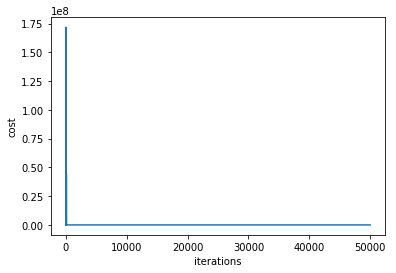

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 129 
H 1.204120714043218
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.12337541750026


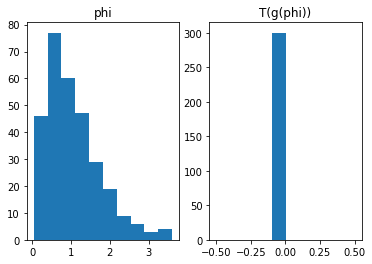

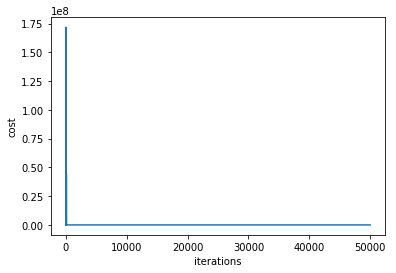

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 130 
H 1.3066634443271405
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.317476400743345


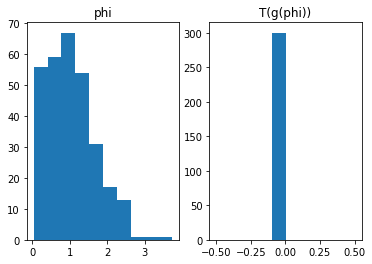

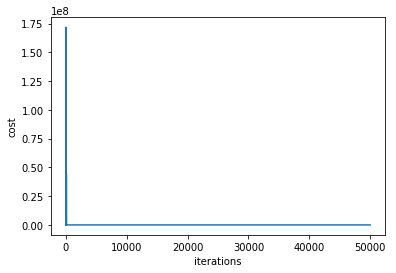

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 131 
H 1.2792819150601111
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.47128657829097


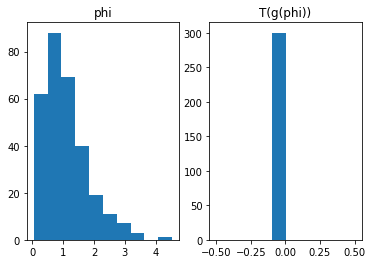

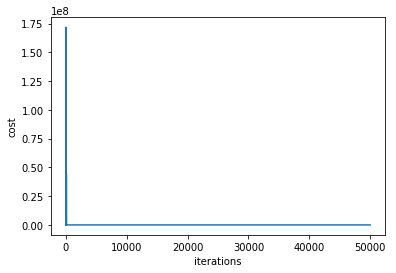

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 132 
H 1.3162242655402878
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.35553848732635


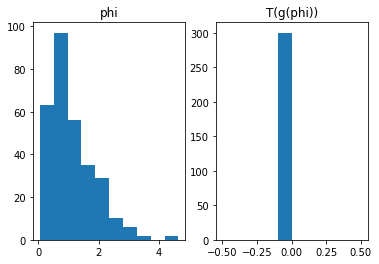

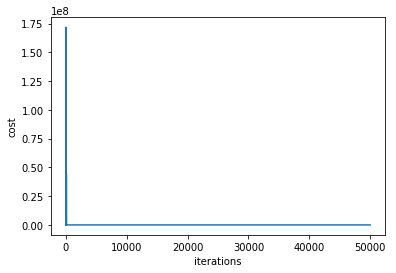

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 133 
H 1.2808007471798655
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.583856063632496


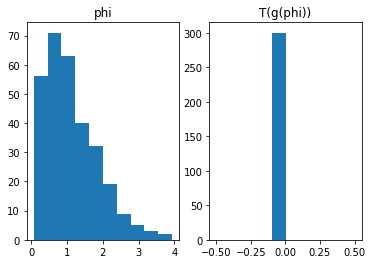

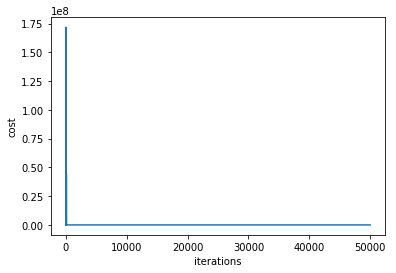

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 134 
H 1.1868506623671693
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 41.92344323159805


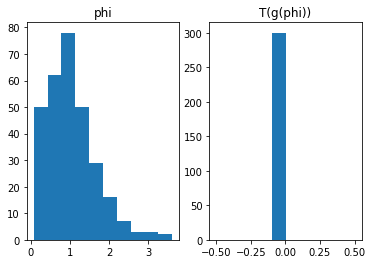

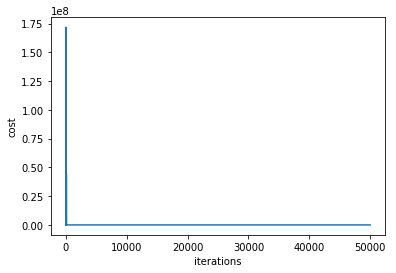

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 135 
H 1.3221993764637412
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.48020503909405


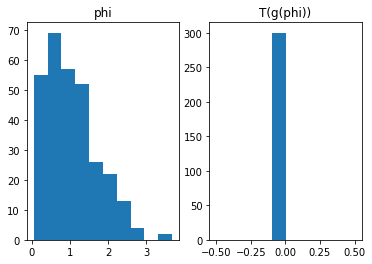

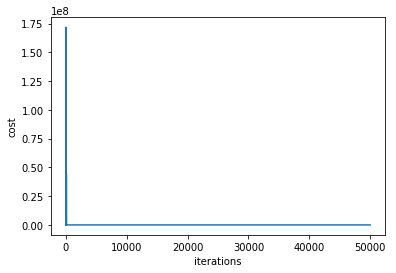

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 136 
H 1.2588318787113184
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.134523105989075


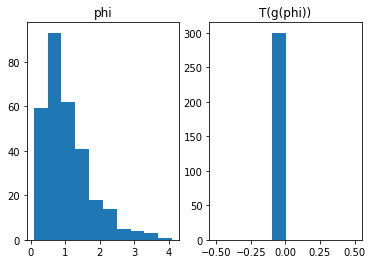

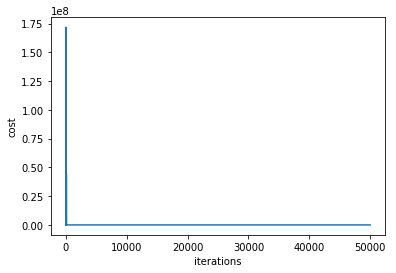

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 137 
H 1.4207173196783136
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 37.69084404589981


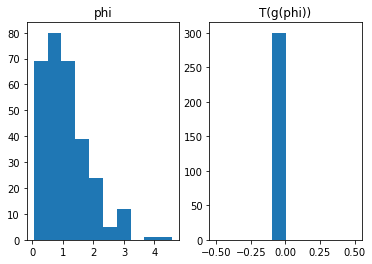

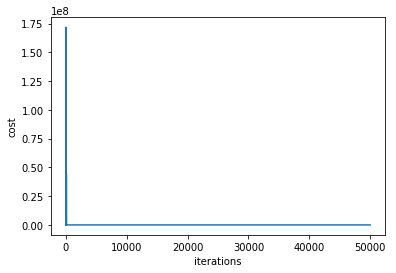

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 138 
H 1.2754911496752674
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 39.033055277301735


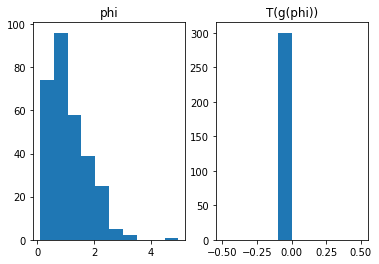

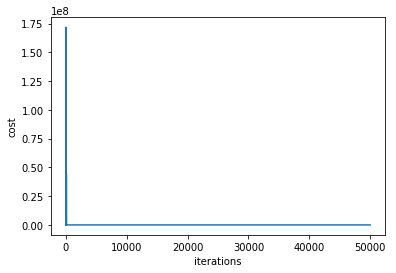

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 139 
H 1.401094873492563
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 43.13604767536289


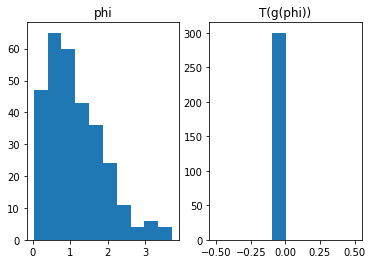

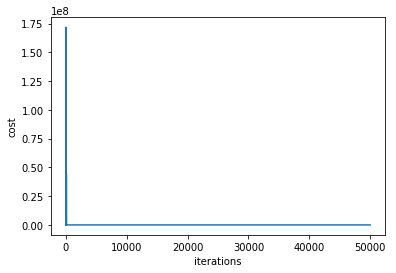

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 140 
H 1.2586509719057188
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 38.66909100289242


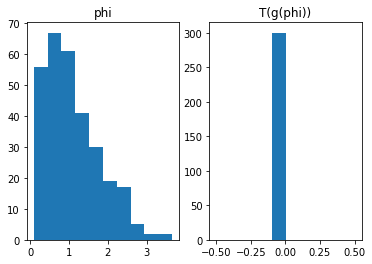

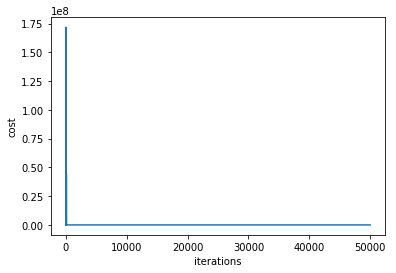

saving to results//tb/damped_harmonic_oscillator_D=3_T=30_flow=1A_rs=0/  ...
******************************************
******************************************
it = 141 
H 1.3890079430879887
E[T_x - mu] =  0.0010000000000000007 0.002384047703841927
cost 16825125.72719338


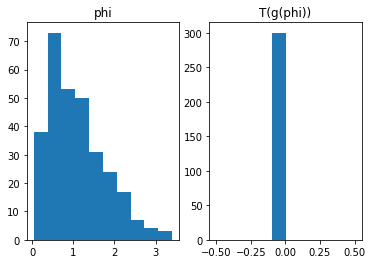

In [ ]:
behavior_str = 'trajectory';
random_seed = 0;

TIF_flow_type = 'AffineFlowLayer';
nlayers = 1;
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};

n = 300;
lr_order = -2;
flow_dict;

system_class = system_from_str(system_str);
system = system_class(behavior_str, T, dt, init_conds);

np.random.seed(0);

behavior = {'mu':mu, 'Sigma':Sigma};
print(behavior)

costs, R2s = train_dsn(system, behavior, n, flow_dict, \
                          lr_order=lr_order, \
                          random_seed=random_seed);

